In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
from sklearn.cluster import KMeans

In [72]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable


# Data callection
EV Sales data are callected from - [parivan selles](https://vahan.parivahan.gov.in/vahan4dashboard/)

ev_carging station data - [data.gov](https://www.data.gov.in/files/ogdpv2dms/s3fs-public/RS_Session_259_AU_2028_B.i.csv
)


In [73]:

df_2019=pd.read_excel("df_2019.xlsx")
df_2020=pd.read_excel("df_2020.xlsx")
df_2021=pd.read_excel("df_2021.xlsx")
df_2022=pd.read_excel("df_2022.xlsx")
df_2023=pd.read_excel("df_2023.xlsx")
df_2024=pd.read_excel("df_2024.xlsx")
df_s2024=pd.read_csv("2024_charging.csv")
df_s2020=pd.read_csv("2020_charging.csv")

In [74]:
df_s2024.sample(5)

,State,No_PCS_2024
2,ARUNACHAL PRADESH,9
9,GUJARAT,476
11,HIMACHAL PRADESH,44
23,PUDUCHERRY,23
12,JAMMU AND KASHMIR,47


In [75]:
df_2019.head()

,State,2W_2019,3W_2019,4W_2019
0,ANDAMAN & NICOBAR ISLAND,0,0,2
1,ANDHRA PRADESH,1376,174,274
2,ARUNACHAL PRADESH,1,0,0
3,ASSAM,98,10757,1
4,BIHAR,714,11653,13


In [76]:
df_2020.head()

,State,2W_2020,3W_2020,4W_2020
0,ANDAMAN & NICOBAR ISLAND,1,0,35
1,ANDHRA PRADESH,925,136,60
2,ARUNACHAL PRADESH,1,0,3
3,ASSAM,40,8310,7
4,BIHAR,384,12041,22


In [77]:
df_2021.head()

,State,2W_2021,3W_2021,4W_2021
0,ANDAMAN & NICOBAR ISLAND,0,30,22
1,ANDHRA PRADESH,7897,459,394
2,ARUNACHAL PRADESH,2,0,0
3,ASSAM,377,15247,8
4,BIHAR,2789,20208,62


In [78]:
df_2022.head()

,State,2W_2022,3W_2022,4W_2022
0,ANDAMAN & NICOBAR ISLAND,16,0,7
1,ANDHRA PRADESH,27585,886,786
2,ARUNACHAL PRADESH,1,0,1
3,ASSAM,1901,38710,89
4,BIHAR,9937,45666,148


In [79]:
df_2023.head()

,State,2W_2023,3W_2023,4W_2023
0,ANDAMAN & NICOBAR ISLAND,12,0,14
1,ANDHRA PRADESH,28542,2497,1675
2,ARUNACHAL PRADESH,3,0,18
3,ASSAM,2453,57901,285
4,BIHAR,12404,75194,619


In [80]:
# chaking shape of Data frame
print('dataframe no of station shape-',df_s2024.shape)
print('datafrmae 2019 EV sell shape-',df_2019.shape)
print('dataframe 2020 EV sell shape-',df_2020.shape)
print('dataframe 2021 EV sell shape-',df_2021.shape)
print('dataframe 2022 EV sell shape-',df_2022.shape)
print('dataframe 2023 EV sell shape-',df_2023.shape)
print('dataframe 2024 EV sell shape-',df_2024.shape)

dataframe no of station shape- (34, 2)
datafrmae 2019 EV sell shape- (32, 4)
dataframe 2020 EV sell shape- (33, 4)
dataframe 2021 EV sell shape- (33, 4)
dataframe 2022 EV sell shape- (33, 4)
dataframe 2023 EV sell shape- (34, 4)
dataframe 2024 EV sell shape- (35, 4)


###  checking the info (columns, datatypes, nulls) of the datasets

In [81]:
print('df_station-',df_s2024.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   State        34 non-null     object
 1   No_PCS_2024  34 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 676.0+ bytes
df_station- None


In [82]:
print('df_station-',df_s2020.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   State        24 non-null     object
 1   No_PCS_2020  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 516.0+ bytes
df_station- None


In [83]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   State    32 non-null     object
 1   2W_2019  32 non-null     int64 
 2   3W_2019  32 non-null     int64 
 3   4W_2019  32 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


In [84]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   State    33 non-null     object
 1   2W_2020  33 non-null     int64 
 2   3W_2020  33 non-null     int64 
 3   4W_2020  33 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ KB


In [85]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   State    33 non-null     object
 1   2W_2021  33 non-null     int64 
 2   3W_2021  33 non-null     int64 
 3   4W_2021  33 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ KB


In [86]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   State    33 non-null     object
 1   2W_2022  33 non-null     int64 
 2   3W_2022  33 non-null     int64 
 3   4W_2022  33 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ KB


In [87]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   State    34 non-null     object
 1   2W_2023  34 non-null     int64 
 2   3W_2023  34 non-null     int64 
 3   4W_2023  34 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ KB


In [88]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   State    35 non-null     object
 1   2W_2024  35 non-null     int64 
 2   3W_2024  35 non-null     int64 
 3   4W_2024  35 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ KB


### getting a statistical summary of the datasets

In [89]:
df_s2024.describe()

,No_PCS_2024
count,34.000000
mean,480.823529
std,1022.735887
min,1.000000
25%,18.750000
50%,129.500000
75%,451.250000
max,5130.000000


In [90]:
df_2019.describe()

,2W_2019,3W_2019,4W_2019
count,32.000000,32.000000,32.000000
mean,949.250000,4171.843750,55.812500
std,1537.042342,10037.663085,119.603495
min,0.000000,0.000000,0.000000
25%,26.750000,2.500000,0.750000
50%,262.500000,339.500000,5.500000
75%,1085.750000,2475.500000,38.250000
max,5727.000000,52009.000000,454.000000


In [91]:
df_2020.describe()

,2W_2020,3W_2020,4W_2020
count,33.000000,33.000000,33.000000
mean,882.545455,2738.939394,128.090909
std,1891.929324,5893.860078,248.414895
min,0.000000,0.000000,0.000000
25%,11.000000,2.000000,3.000000
50%,128.000000,322.000000,22.000000
75%,610.000000,2202.000000,101.000000
max,8683.000000,29935.000000,931.000000


In [92]:
df_2021.describe()

,2W_2021,3W_2021,4W_2021
count,33.000000,33.000000,33.000000
mean,4737.121212,4795.696970,424.757576
std,7538.268049,11136.028729,826.255145
min,0.000000,0.000000,0.000000
25%,20.000000,11.000000,6.000000
50%,1210.000000,1197.000000,61.000000
75%,5881.000000,4269.000000,334.000000
max,29620.000000,60125.000000,3749.000000


In [93]:
df_2022.describe()

,2W_2022,3W_2022,4W_2022
count,33.000000,33.000000,33.000000
mean,19133.151515,10622.757576,1168.757576
std,28358.318419,25413.331715,2358.541618
min,1.000000,0.000000,0.000000
25%,196.000000,25.000000,18.000000
50%,6730.000000,2295.000000,244.000000
75%,25724.000000,6794.000000,836.000000
max,117552.000000,138576.000000,11701.000000


In [94]:
df_2023.describe()

,2W_2023,3W_2023,4W_2023
count,34.000000,34.000000,34.000000
mean,25306.176471,17167.882353,2495.235294
std,39802.247400,41561.720405,3778.354861
min,3.000000,0.000000,0.000000
25%,189.250000,42.000000,34.250000
50%,7426.500000,5025.500000,750.000000
75%,37384.750000,12821.250000,2732.500000
max,168042.000000,232605.000000,14231.000000


In [95]:
df_2024.describe()

,2W_2024,3W_2024,4W_2024
count,35.000000,35.000000,35.000000
mean,23403.028571,14420.400000,2126.400000
std,34910.819844,34488.442311,3014.398596
min,0.000000,0.000000,0.000000
25%,268.500000,65.500000,68.000000
50%,6908.000000,4321.000000,691.000000
75%,38056.500000,11451.000000,2746.000000
max,146739.000000,195052.000000,11145.000000


## marge the data for simplicity

In [96]:

# Step 1: Store the DataFrames in a tuple
df_tuple = (df_2019, df_2020, df_2021, df_2022, df_2023, df_2024,df_s2024)

# Step 2: Merge all DataFrames using an outer join
df_combined = reduce(lambda left, right: pd.merge(left, right, on='State', how='outer'), df_tuple).fillna(0)

## Analysis of charging stations sanctioned

observation : Maharashtra, Karnataka, Kerala and Delhi are among the top states with the majority of EV charging stations sanctioned while the remaining states have less number of the same.

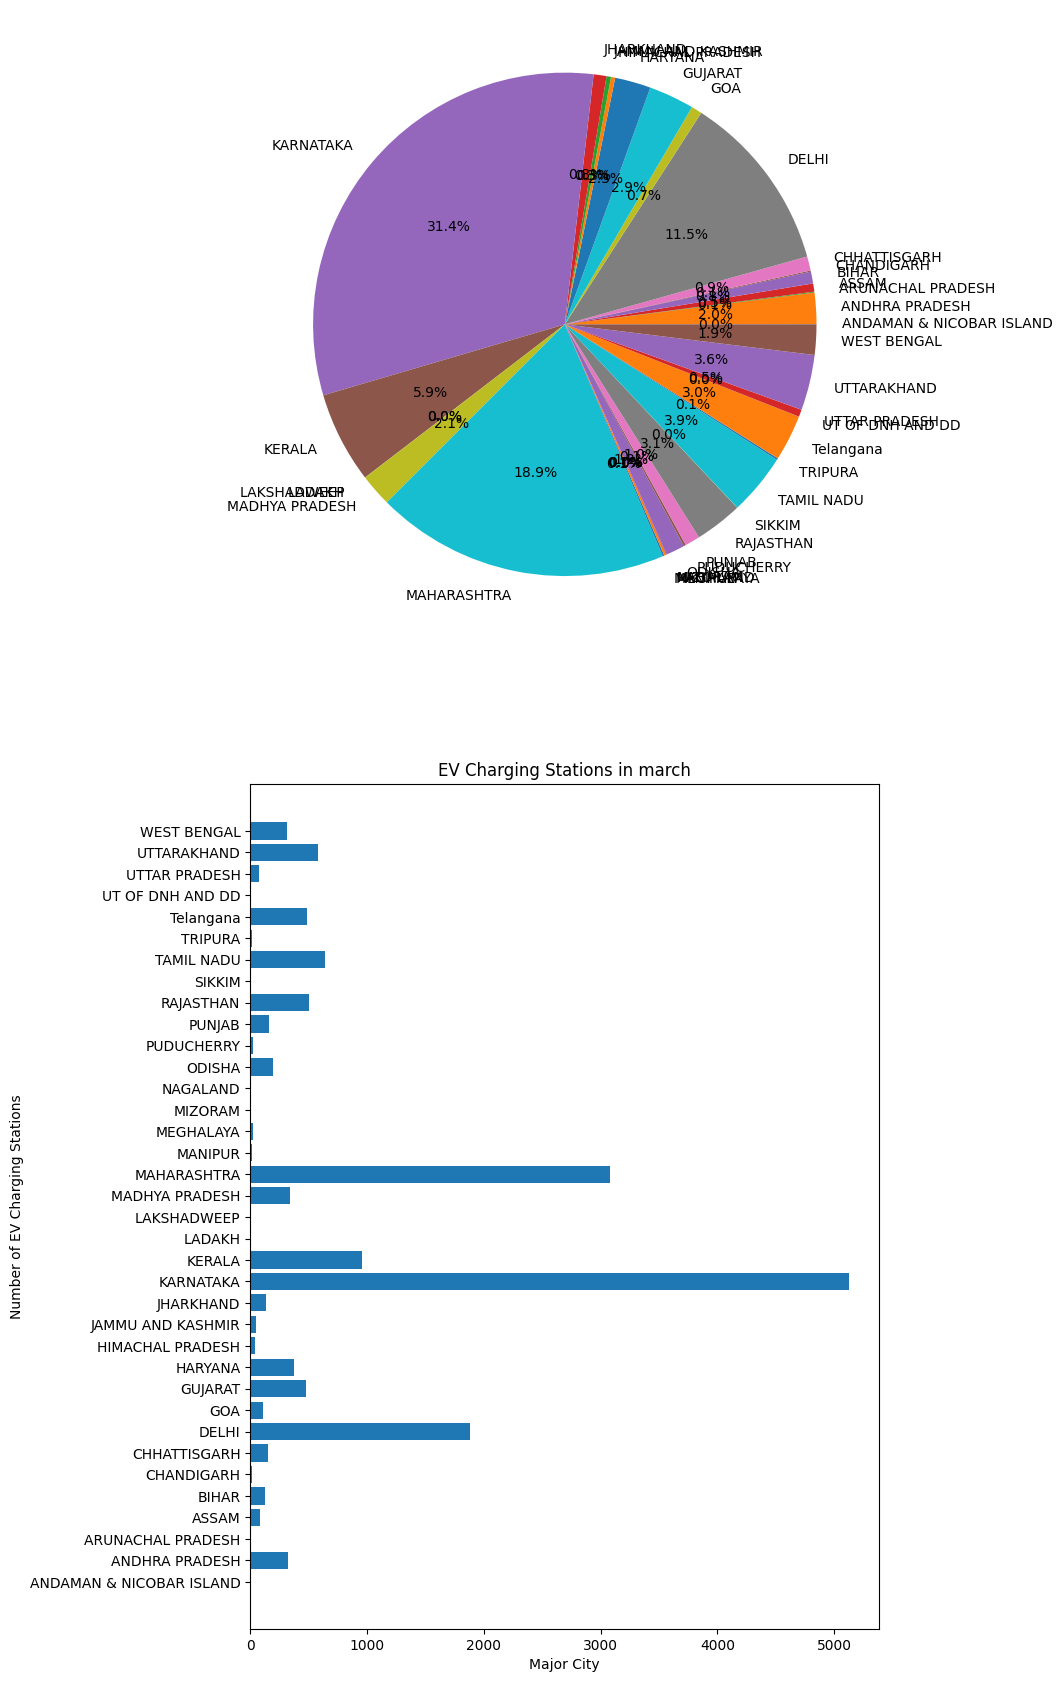

In [97]:
fig, pi = plt.subplots(2,figsize=(10, 18)) 
pi[0].pie(df_combined['No_PCS_2024'],labels=df_combined['State'], autopct='%1.1f%%')
pi[1].barh(df_combined['State'],df_combined['No_PCS_2024'])
pi[1].set_title('EV Charging Stations in march')
pi[1].set_xlabel('Major City')
pi[1].set_ylabel('Number of EV Charging Stations')
plt.tight_layout()
plt.show()

In [98]:
df_s2020

,State,No_PCS_2020
0,ANDHRA PRADESH,266
1,ASSAM,20
2,BIHAR,37
3,CHANDIGARH,70
4,CHHATTISGARH,25
5,DELHI,72
6,GUJARAT,228
7,HARYANA,50
8,HIMACHAL PRADESH,10
9,JAMMU AND KASHMIR,25


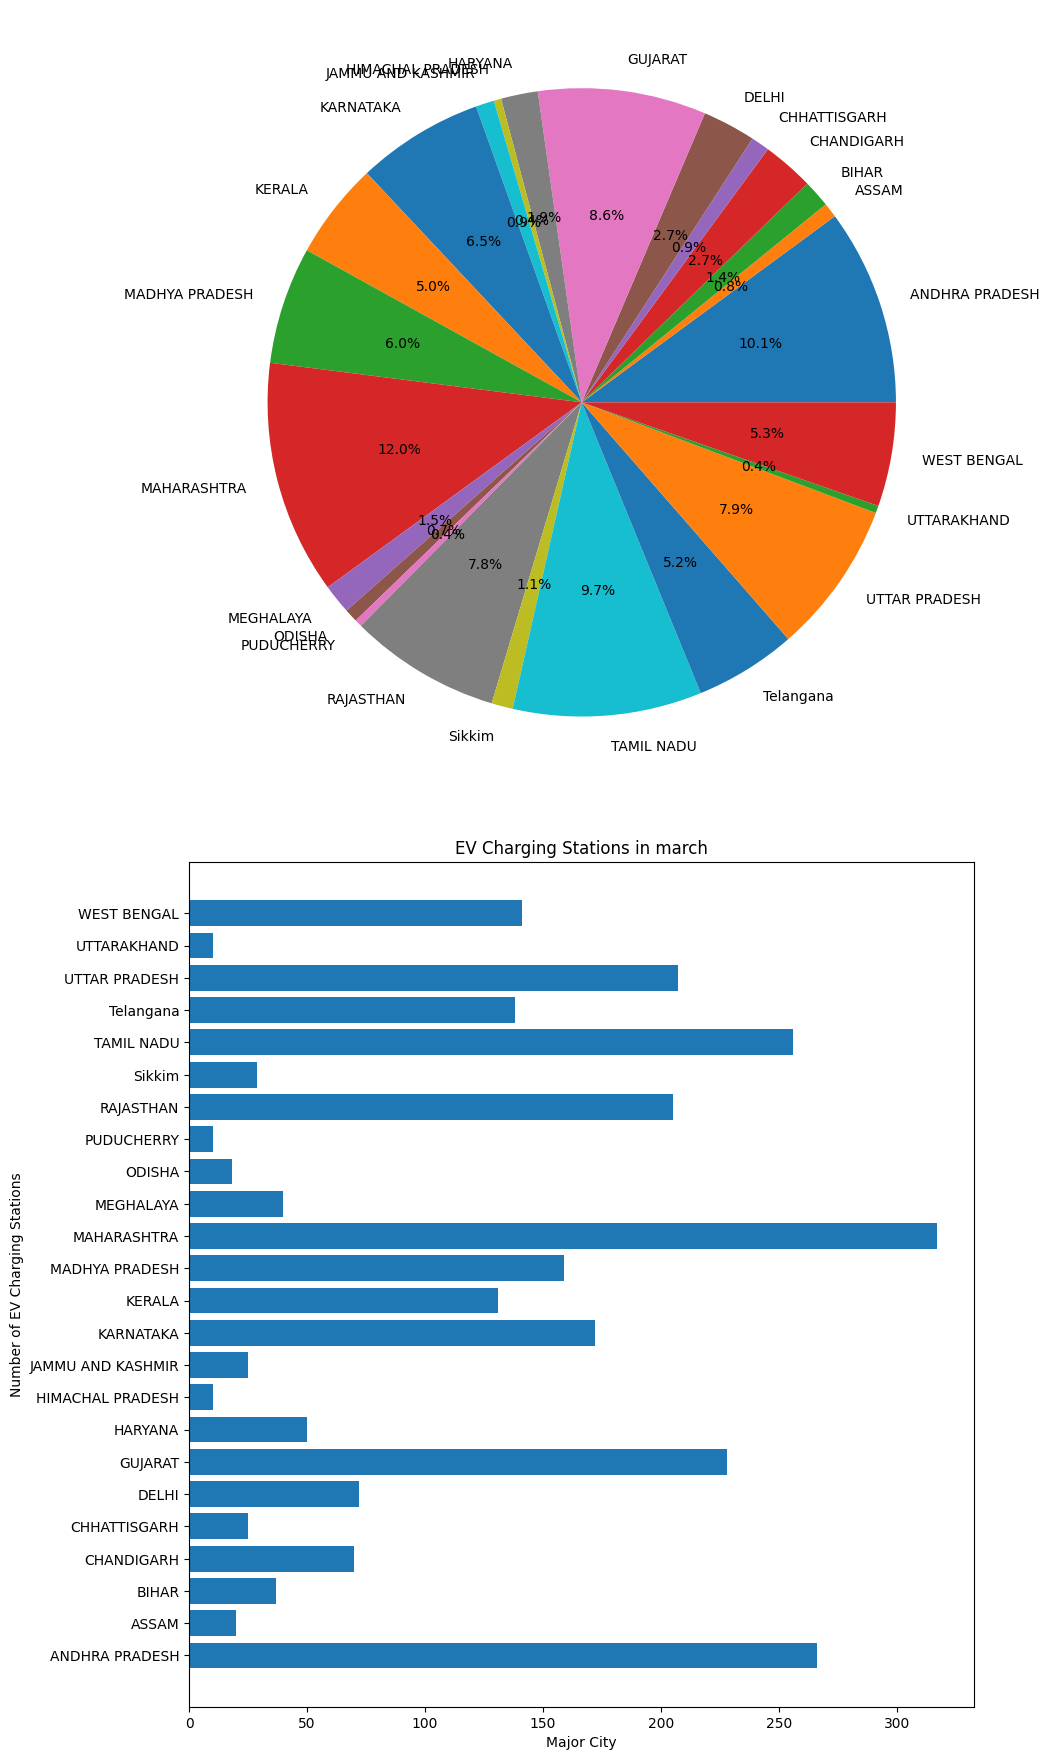

In [99]:
fig, pi = plt.subplots(2,figsize=(10, 18)) 
pi[0].pie(df_s2020['No_PCS_2020'],labels=df_s2020['State'], autopct='%1.1f%%')
pi[1].barh(df_s2020['State'],df_s2020['No_PCS_2020'])
pi[1].set_title('EV Charging Stations in march')
pi[1].set_xlabel('Major City')
pi[1].set_ylabel('Number of EV Charging Stations')
plt.tight_layout()
plt.show()

# Analysis of 2-Wheeler EVs

### in 5 year market grow to 2000% present ,Maharashtra and Karnataka olway have highter contribution camper to ather

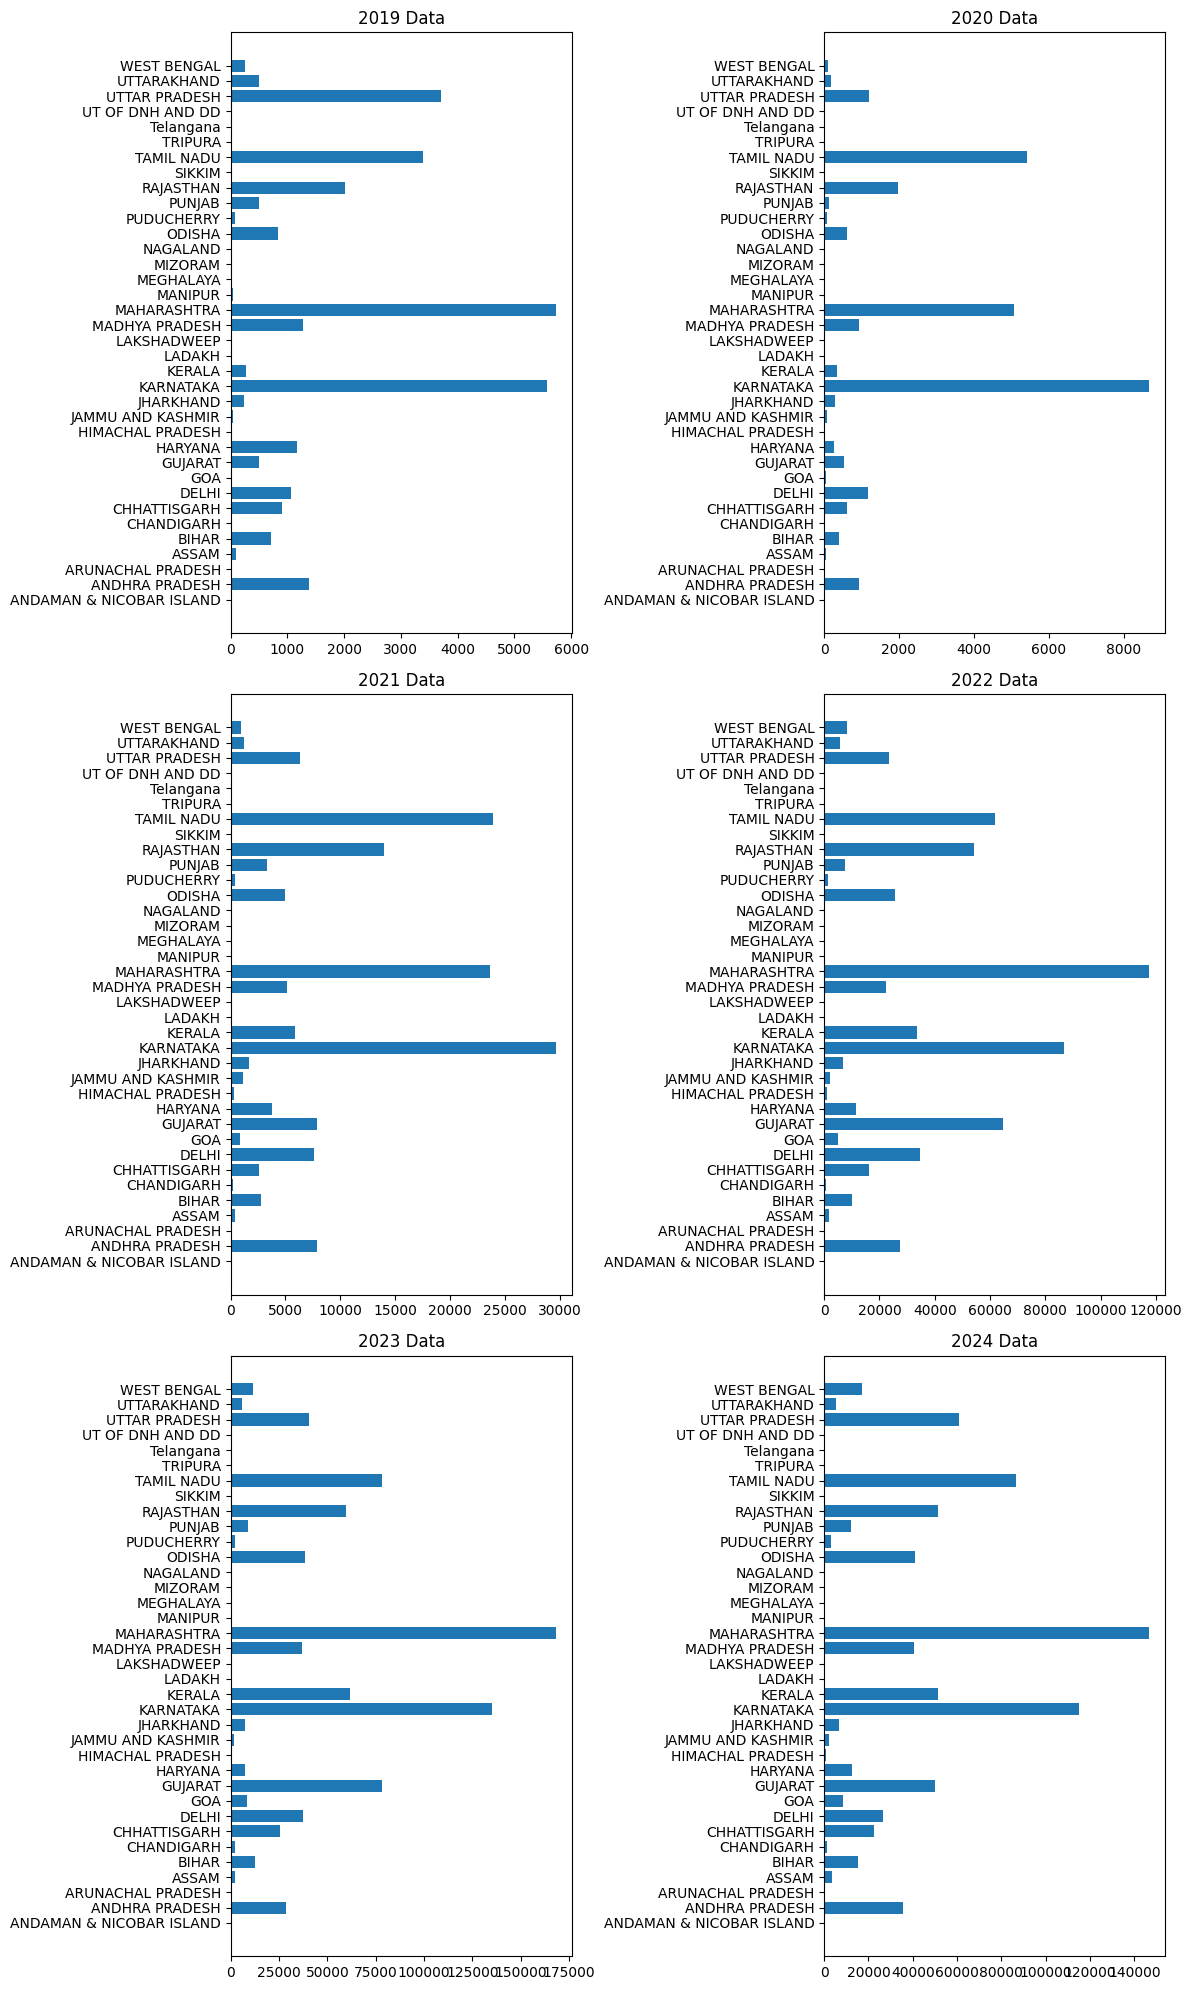

In [100]:
fig, ax = plt.subplots(3, 2,figsize=(12,20))  # Creates a grid of 3 rows and 2 columns of subplots

# Populate each subplot with data
ax[0,0].barh(df_combined['State'], df_combined['2W_2019'])
ax[0,1].barh(df_combined['State'], df_combined['2W_2020'])
ax[1,0].barh(df_combined['State'], df_combined['2W_2021'])
ax[1,1].barh(df_combined['State'], df_combined['2W_2022'])
ax[2,0].barh(df_combined['State'], df_combined['2W_2023'])
ax[2,1].barh(df_combined['State'], df_combined['2W_2024'])
#for axes in ax.flat:
    #axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

# Add titles or labels as necessary
ax[0, 0].set_title('2019 Data')

ax[0, 1].set_title('2020 Data')

ax[1, 0].set_title('2021 Data')

ax[1, 1].set_title('2022 Data')

ax[2, 0].set_title('2023 Data')

ax[2, 1].set_title('2024 Data')

plt.tight_layout()  # Adjusts layout to prevent overlap
plt.show()

### Maharashtra,Karntaka,Gujarat,Tamil Nadu those 4 contribute more then 50% of market on 2 wheelers

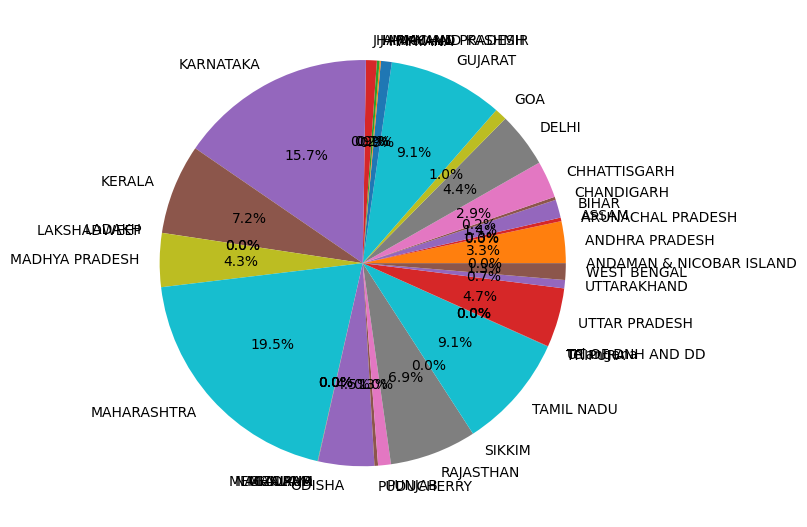

In [101]:
fig, pi = plt.subplots(figsize=(8, 8)) 
pi.pie(df_combined['2W_2023'],labels=df_combined['State'], autopct='%1.1f%%')

plt.tight_layout()
plt.show()

# Analysis of 3-Wheeler EVs

### on 5 year ev market grow to 500% persent ,Uttar Pradesh contribute olwas hiher then ather

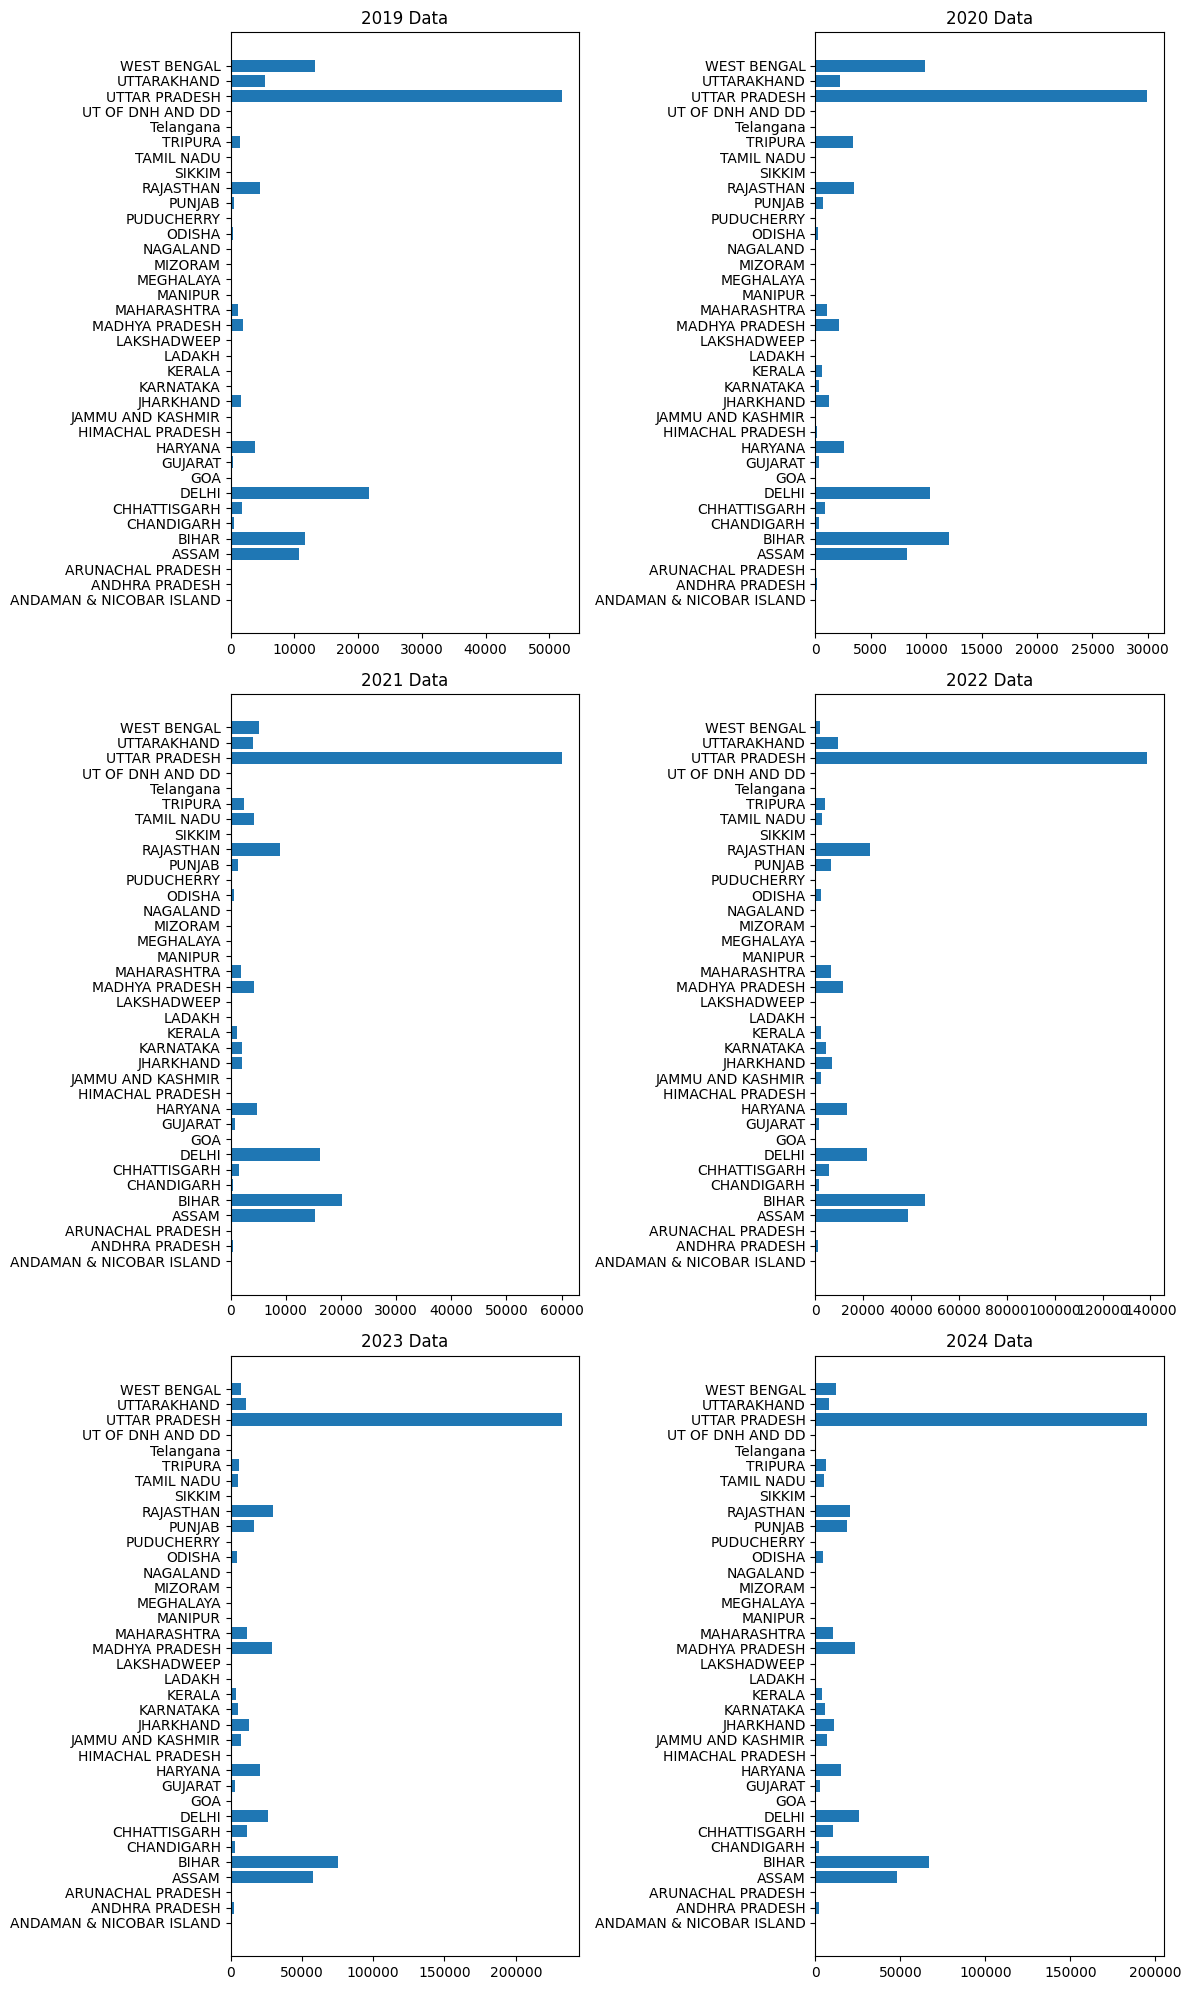

In [102]:
fig, ax = plt.subplots(3, 2,figsize=(12,20))  # Creates a grid of 3 rows and 2 columns of subplots

# Populate each subplot with data
ax[0,0].barh(df_combined['State'], df_combined['3W_2019'])
ax[0,1].barh(df_combined['State'], df_combined['3W_2020'])
ax[1,0].barh(df_combined['State'], df_combined['3W_2021'])
ax[1,1].barh(df_combined['State'], df_combined['3W_2022'])
ax[2,0].barh(df_combined['State'], df_combined['3W_2023'])
ax[2,1].barh(df_combined['State'], df_combined['3W_2024'])
#for axes in ax.flat:
    #axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

# Add titles or labels as necessary
ax[0, 0].set_title('2019 Data')

ax[0, 1].set_title('2020 Data')

ax[1, 0].set_title('2021 Data')

ax[1, 1].set_title('2022 Data')

ax[2, 0].set_title('2023 Data')

ax[2, 1].set_title('2024 Data')

plt.tight_layout()  # Adjusts layout to prevent overlap
plt.show()

### Uttar Pradesh,Bihar,Assam contibute more then 60% of market

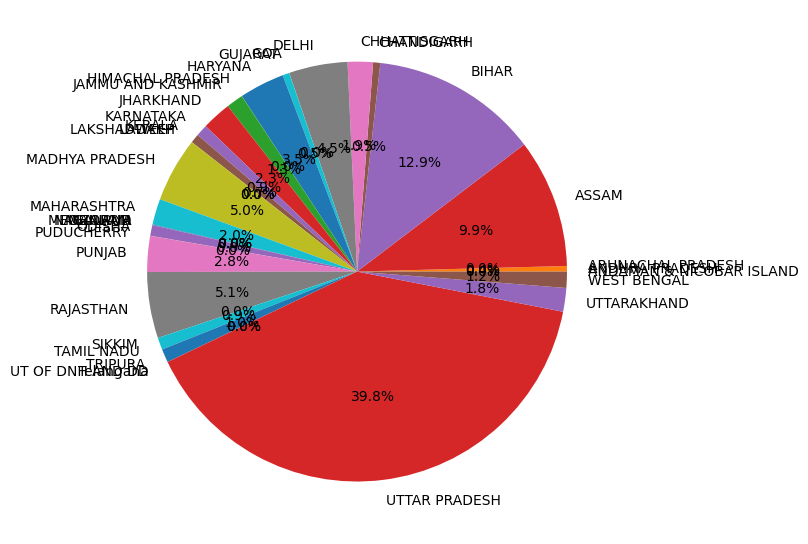

In [103]:
fig, pi = plt.subplots(figsize=(8, 8)) 
pi.pie(df_combined['3W_2023'],labels=df_combined['State'], autopct='%1.1f%%')

plt.tight_layout()
plt.show()

## Analysis of 4-Wheeler EVs

### maharashtra,karnatka,kerala,Delhi contibute more then 50% of ev market 

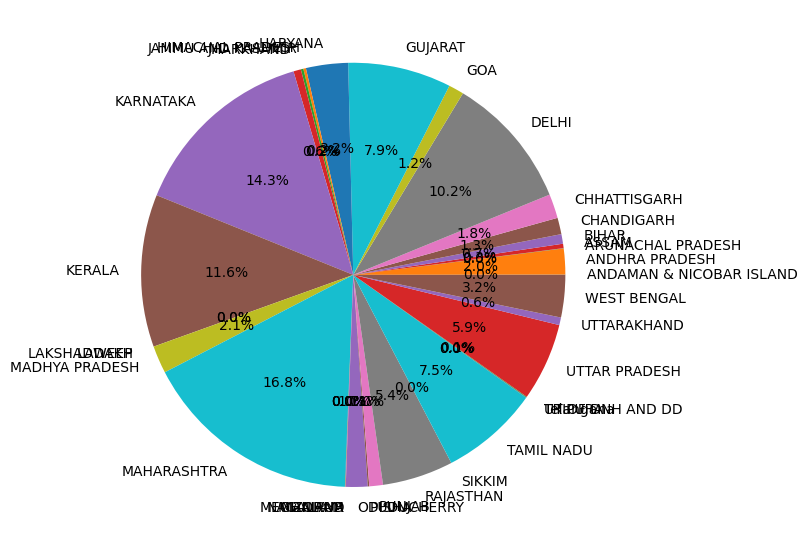

In [104]:
fig, pi = plt.subplots(figsize=(8, 8)) 
pi.pie(df_combined['4W_2023'],labels=df_combined['State'], autopct='%1.1f%%')

plt.tight_layout()
plt.show()

### on 5 year maret grow to 2800% persent,maharashrta contribute olwas higer then ather , uttar pradesh contribution is increging resently 

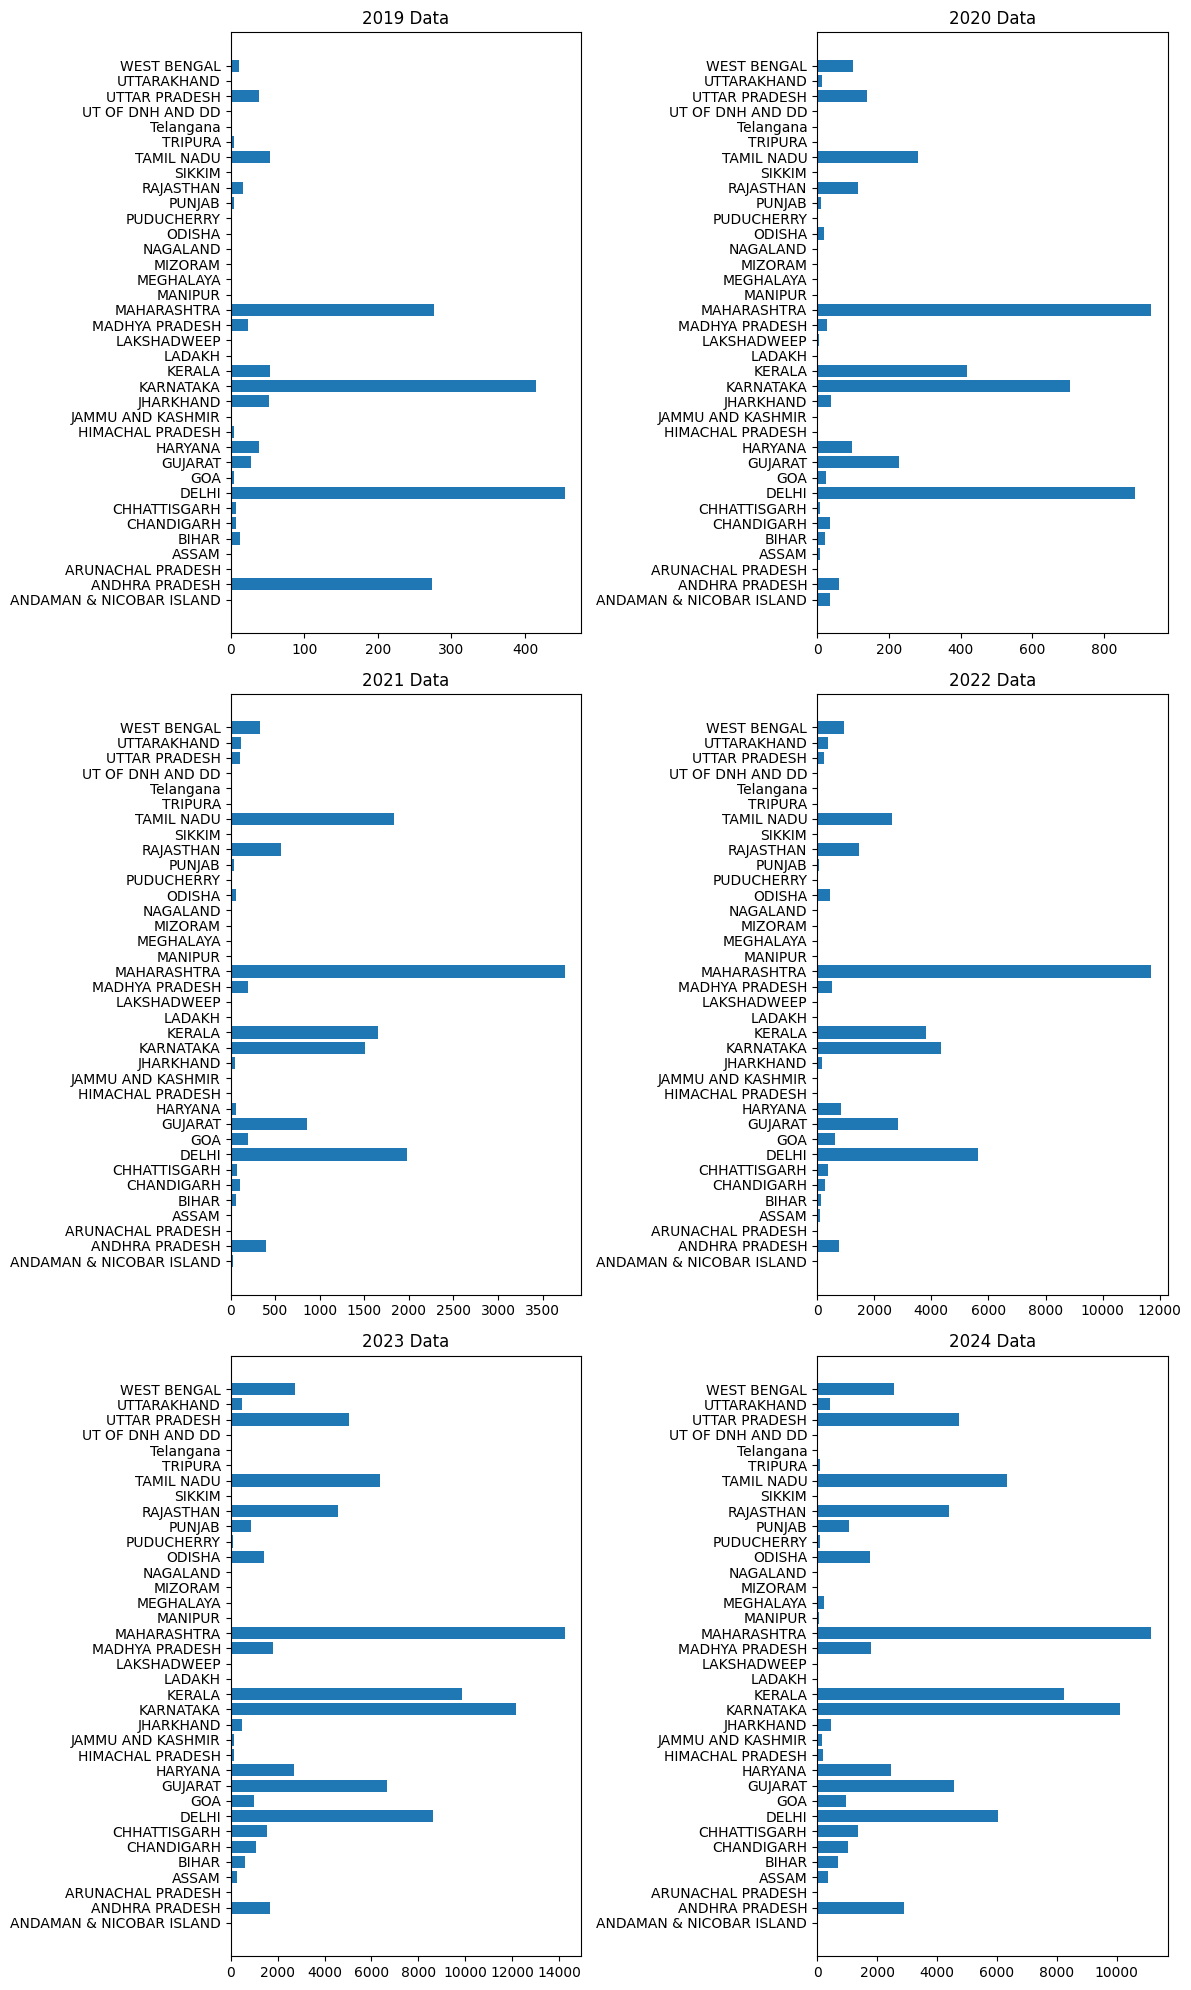

In [105]:
fig, ax = plt.subplots(3, 2,figsize=(12,20))  # Creates a grid of 3 rows and 2 columns of subplots

# Populate each subplot with data
ax[0,0].barh(df_combined['State'], df_combined['4W_2019'])
ax[0,1].barh(df_combined['State'], df_combined['4W_2020'])
ax[1,0].barh(df_combined['State'], df_combined['4W_2021'])
ax[1,1].barh(df_combined['State'], df_combined['4W_2022'])
ax[2,0].barh(df_combined['State'], df_combined['4W_2023'])
ax[2,1].barh(df_combined['State'], df_combined['4W_2024'])
#for axes in ax.flat:
    #axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

# Add titles or labels as necessary
ax[0, 0].set_title('2019 Data')

ax[0, 1].set_title('2020 Data')

ax[1, 0].set_title('2021 Data')

ax[1, 1].set_title('2022 Data')

ax[2, 0].set_title('2023 Data')

ax[2, 1].set_title('2024 Data')

plt.tight_layout()  # Adjusts layout to prevent overlap
plt.show()


## In this Bar plot we can se that higest ev sell contribution are also have higest charging station

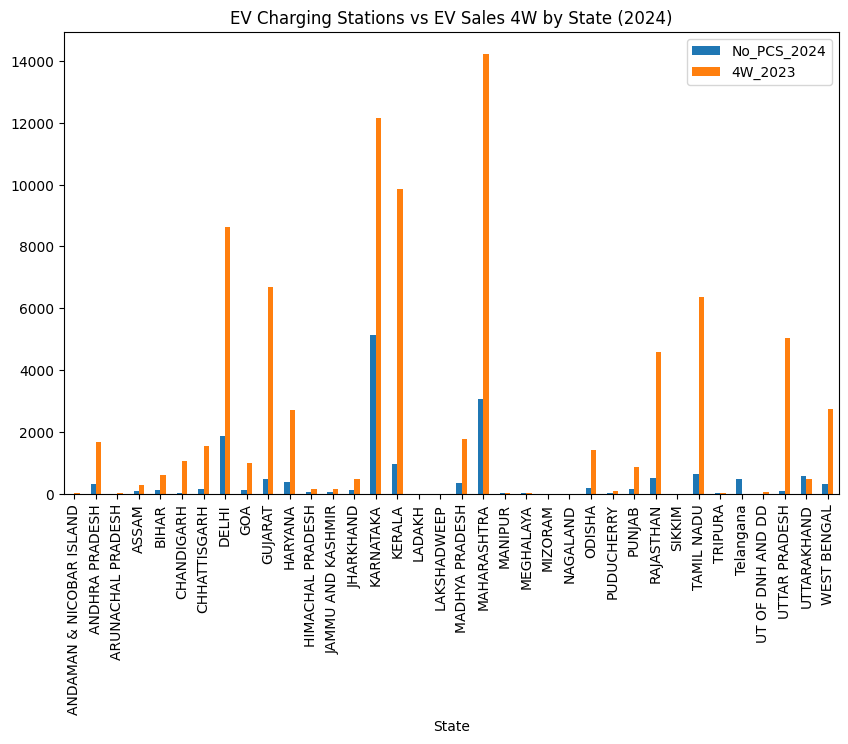

In [106]:




# Then plot the data
df_combined.plot(kind='bar', x='State', y=['No_PCS_2024', '4W_2023'], figsize=(10,6))
plt.title('EV Charging Stations vs EV Sales 4W by State (2024)')
plt.show()



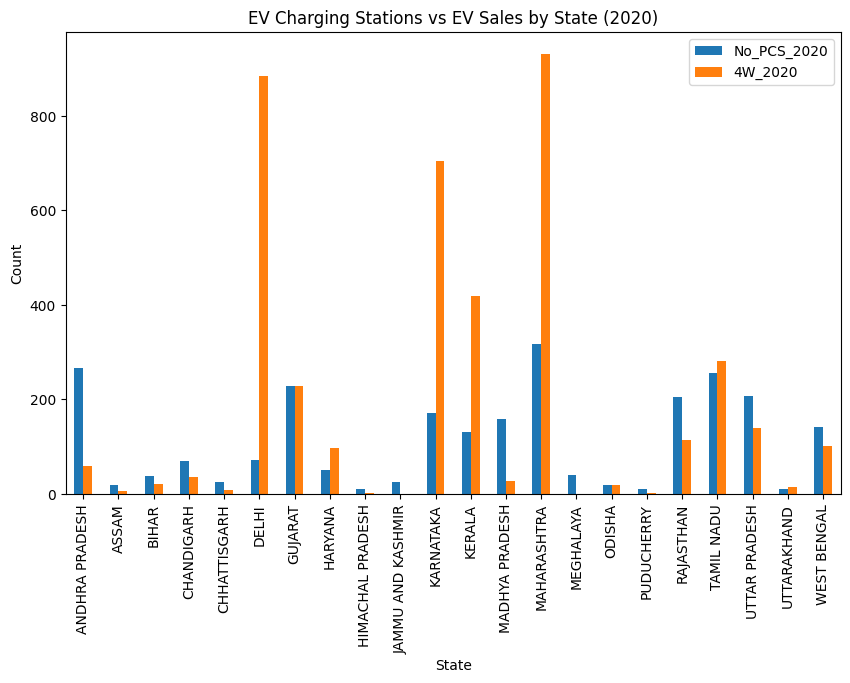

In [107]:
# Assuming you have merged your datasets on 'State' for comparison
df_combined1 = pd.merge(df_s2020, df_2020, on='State')

df_combined1.plot(kind='bar', x='State', y=['No_PCS_2020', '4W_2020'], figsize=(10,6))
plt.title('EV Charging Stations vs EV Sales by State (2020)')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


### as number of Charging Stations are incresing EV Sales also incresing the treand line going upved diration

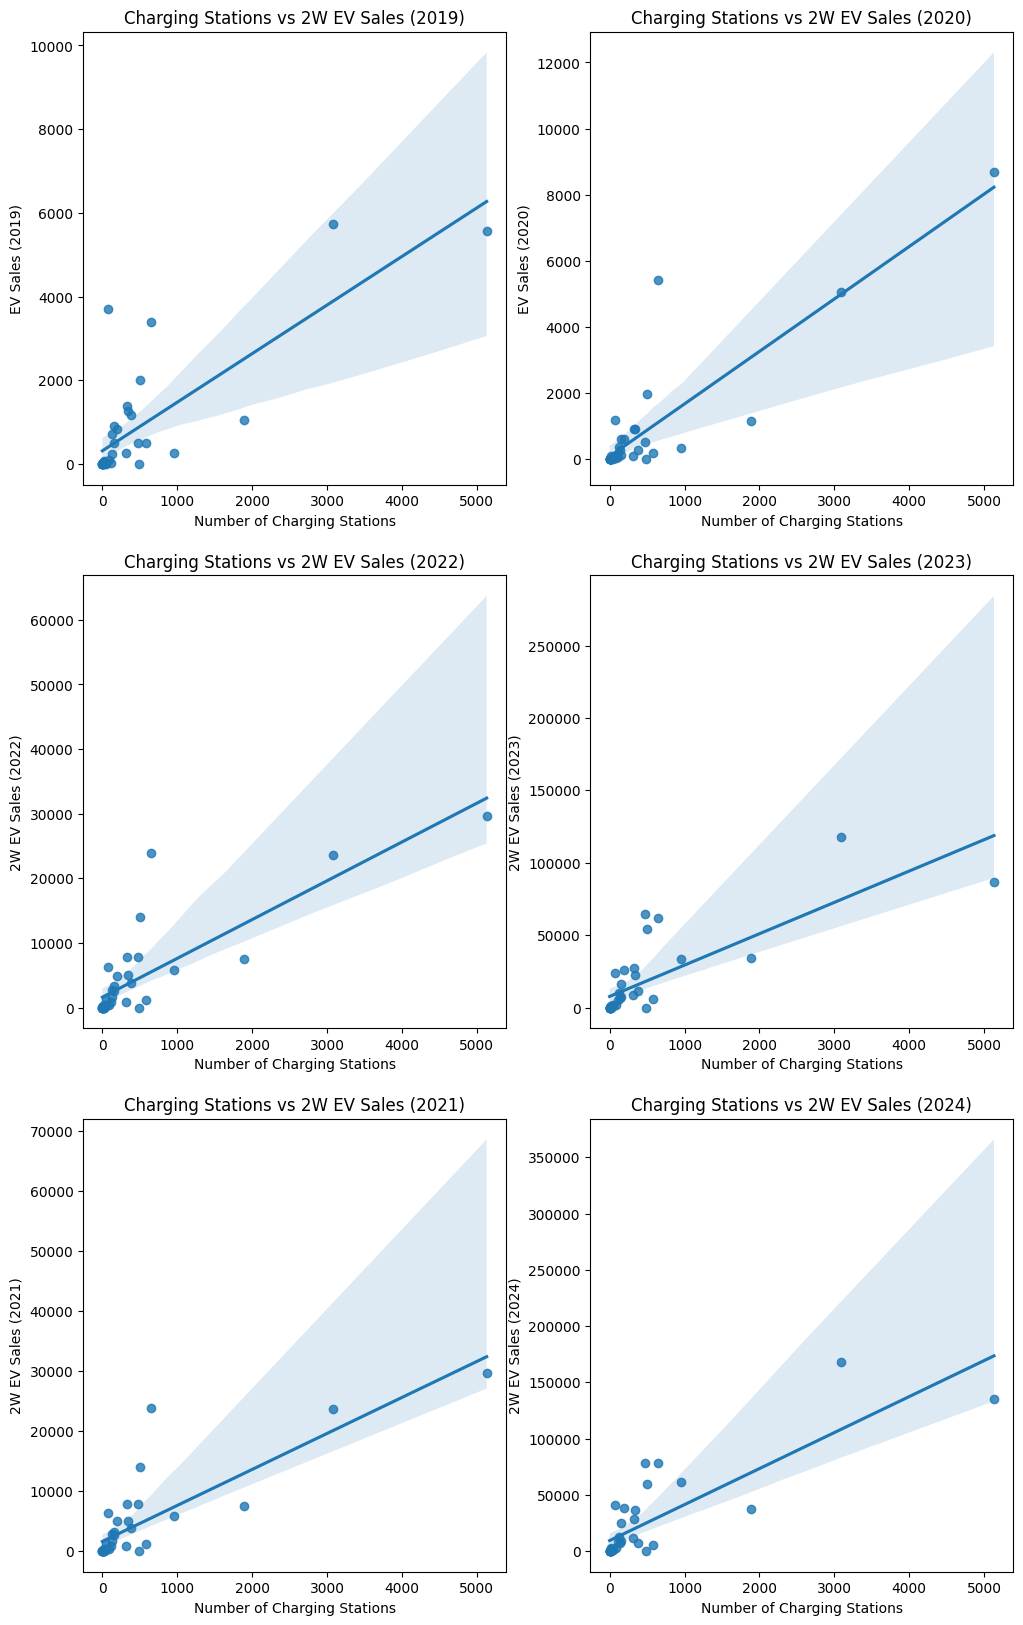

In [108]:
fig,axes=plt.subplots(3, 2,figsize=(12,20))
sns.regplot(x='No_PCS_2024', y='2W_2019', data=df_combined,ax=axes[0, 0])
axes[0,0].set_title('Charging Stations vs 2W EV Sales (2019)')
axes[0,0].set_xlabel('Number of Charging Stations')
axes[0,0].set_ylabel('EV Sales (2019)')
sns.regplot(x='No_PCS_2024', y='2W_2020', data=df_combined,ax=axes[0, 1])
axes[0,1].set_title('Charging Stations vs 2W EV Sales (2020)')
axes[0,1].set_xlabel('Number of Charging Stations')
axes[0,1].set_ylabel('EV Sales (2020)')
sns.regplot(x='No_PCS_2024', y='2W_2021', data=df_combined,ax=axes[2,0])
axes[2,0].set_title('Charging Stations vs 2W EV Sales (2021)')
axes[2,0].set_xlabel('Number of Charging Stations')
axes[2,0].set_ylabel('2W EV Sales (2021)')
sns.regplot(x='No_PCS_2024', y='2W_2021', data=df_combined,ax=axes[1, 0])
axes[1,0].set_title('Charging Stations vs 2W EV Sales (2022)')
axes[1,0].set_xlabel('Number of Charging Stations')
axes[1,0].set_ylabel('2W EV Sales (2022)')
sns.regplot(x='No_PCS_2024', y='2W_2022', data=df_combined,ax=axes[1,1])

axes[1,1].set_title('Charging Stations vs 2W EV Sales (2023)')
axes[1,1].set_xlabel('Number of Charging Stations')
axes[1,1].set_ylabel('2W EV Sales (2023)')
sns.regplot(x='No_PCS_2024', y='2W_2023', data=df_combined,ax=axes[2,1])
axes[2,1].set_title('Charging Stations vs 2W EV Sales (2024)')
axes[2,1].set_xlabel('Number of Charging Stations')
axes[2,1].set_ylabel('2W EV Sales (2024)')
plt.show()

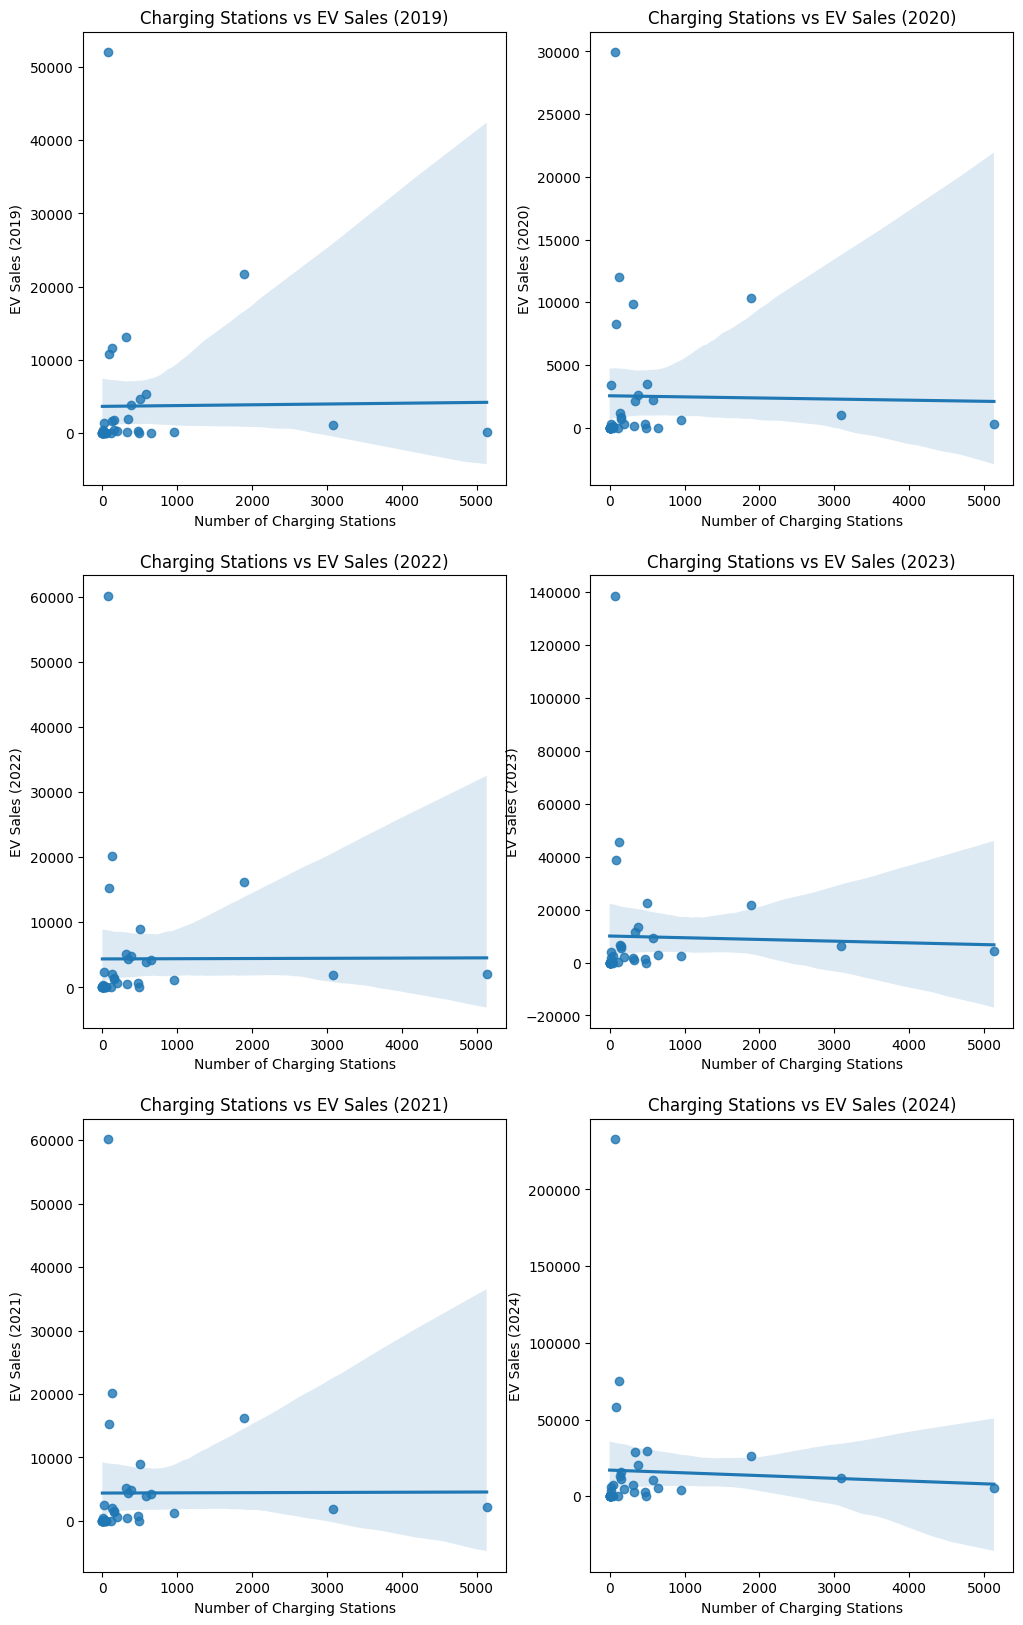

In [109]:
fig,axes=plt.subplots(3, 2,figsize=(12,20))
sns.regplot(x='No_PCS_2024', y='3W_2019', data=df_combined,ax=axes[0, 0])
axes[0,0].set_title('Charging Stations vs EV Sales (2019)')
axes[0,0].set_xlabel('Number of Charging Stations')
axes[0,0].set_ylabel('EV Sales (2019)')
sns.regplot(x='No_PCS_2024', y='3W_2020', data=df_combined,ax=axes[0, 1])
axes[0,1].set_title('Charging Stations vs EV Sales (2020)')
axes[0,1].set_xlabel('Number of Charging Stations')
axes[0,1].set_ylabel('EV Sales (2020)')
sns.regplot(x='No_PCS_2024', y='3W_2021', data=df_combined,ax=axes[2,0])
axes[2,0].set_title('Charging Stations vs EV Sales (2021)')
axes[2,0].set_xlabel('Number of Charging Stations')
axes[2,0].set_ylabel('EV Sales (2021)')
sns.regplot(x='No_PCS_2024', y='3W_2021', data=df_combined,ax=axes[1, 0])
axes[1,0].set_title('Charging Stations vs EV Sales (2022)')
axes[1,0].set_xlabel('Number of Charging Stations')
axes[1,0].set_ylabel('EV Sales (2022)')
sns.regplot(x='No_PCS_2024', y='3W_2022', data=df_combined,ax=axes[1,1])

axes[1,1].set_title('Charging Stations vs EV Sales (2023)')
axes[1,1].set_xlabel('Number of Charging Stations')
axes[1,1].set_ylabel('EV Sales (2023)')
sns.regplot(x='No_PCS_2024', y='3W_2023', data=df_combined,ax=axes[2,1])
axes[2,1].set_title('Charging Stations vs EV Sales (2024)')
axes[2,1].set_xlabel('Number of Charging Stations')
axes[2,1].set_ylabel('EV Sales (2024)')
plt.show()

### as number of Charging Stations are incresing EV Sales also incresing the treand line going upved diration 

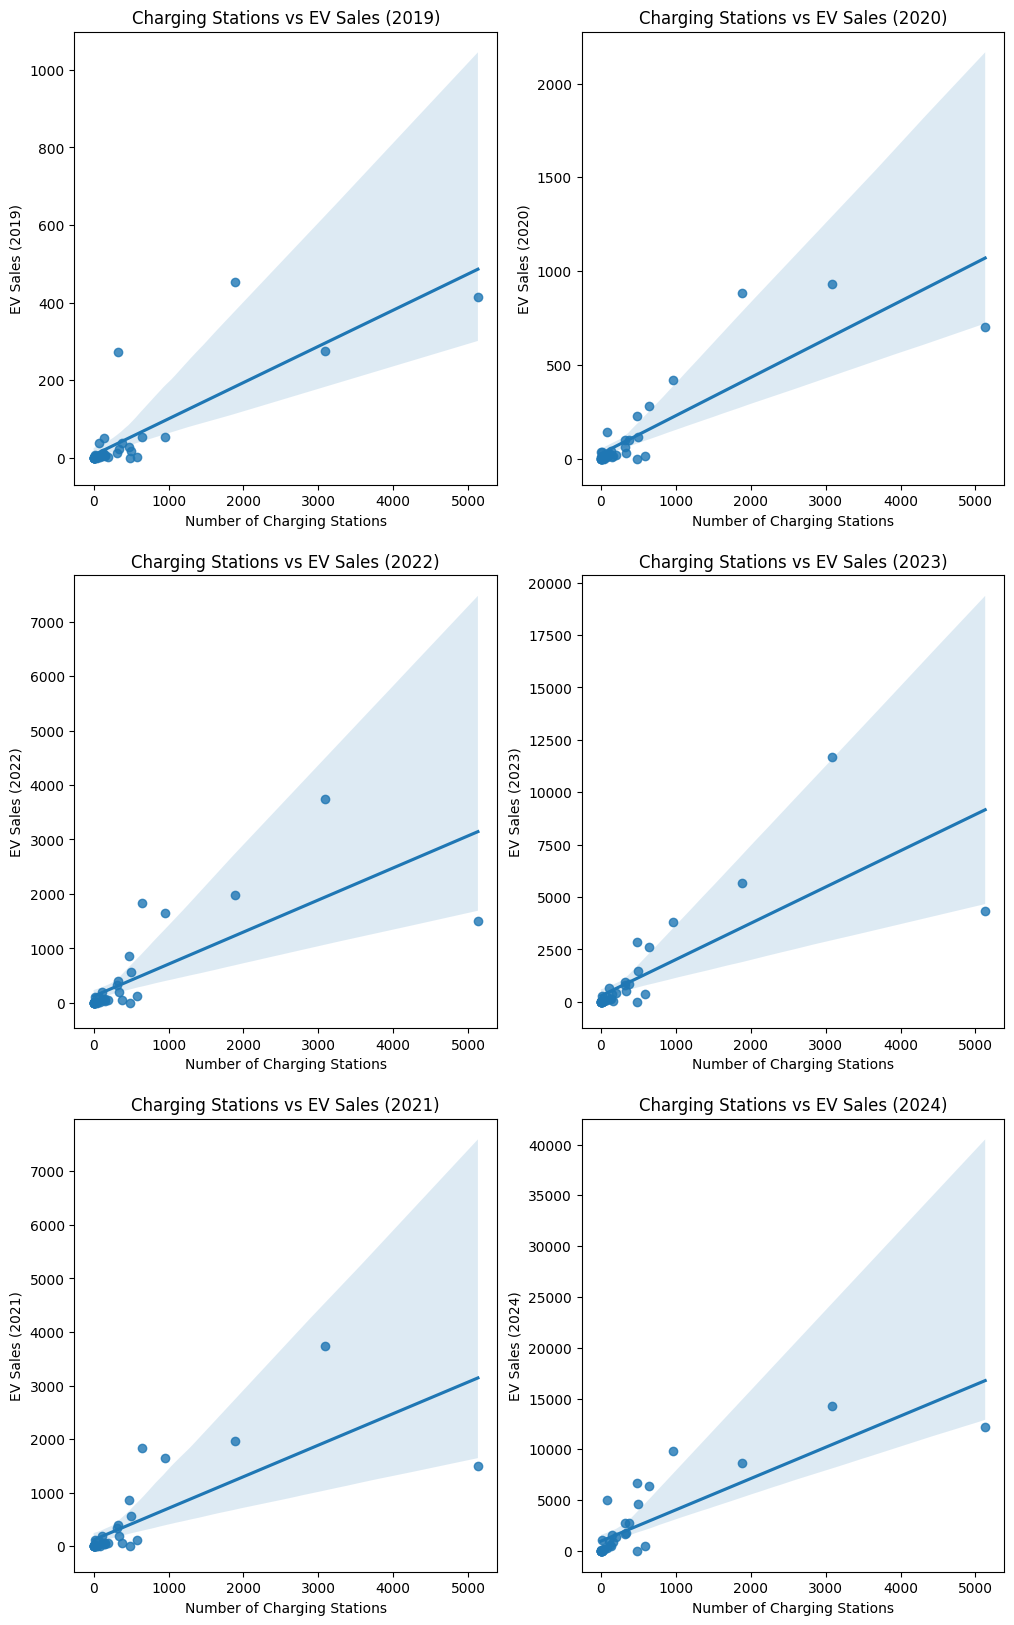

In [110]:
fig,axes=plt.subplots(3, 2,figsize=(12,20))
sns.regplot(x='No_PCS_2024', y='4W_2019', data=df_combined,ax=axes[0, 0])
axes[0,0].set_title('Charging Stations vs EV Sales (2019)')
axes[0,0].set_xlabel('Number of Charging Stations')
axes[0,0].set_ylabel('EV Sales (2019)')
sns.regplot(x='No_PCS_2024', y='4W_2020', data=df_combined,ax=axes[0, 1])
axes[0,1].set_title('Charging Stations vs EV Sales (2020)')
axes[0,1].set_xlabel('Number of Charging Stations')
axes[0,1].set_ylabel('EV Sales (2020)')
sns.regplot(x='No_PCS_2024', y='4W_2021', data=df_combined,ax=axes[2,0])
axes[2,0].set_title('Charging Stations vs EV Sales (2021)')
axes[2,0].set_xlabel('Number of Charging Stations')
axes[2,0].set_ylabel('EV Sales (2021)')
sns.regplot(x='No_PCS_2024', y='4W_2021', data=df_combined,ax=axes[1, 0])
axes[1,0].set_title('Charging Stations vs EV Sales (2022)')
axes[1,0].set_xlabel('Number of Charging Stations')
axes[1,0].set_ylabel('EV Sales (2022)')
sns.regplot(x='No_PCS_2024', y='4W_2022', data=df_combined,ax=axes[1,1])

axes[1,1].set_title('Charging Stations vs EV Sales (2023)')
axes[1,1].set_xlabel('Number of Charging Stations')
axes[1,1].set_ylabel('EV Sales (2023)')
sns.regplot(x='No_PCS_2024', y='4W_2023', data=df_combined,ax=axes[2,1])
axes[2,1].set_title('Charging Stations vs EV Sales (2024)')
axes[2,1].set_xlabel('Number of Charging Stations')
axes[2,1].set_ylabel('EV Sales (2024)')
plt.show()

# line plot for EV sales

in this line plot we see as time sell growths are upword diraction like Maharashtra ,Karnataka show very Higest growth on 2021 to 2024

The upward trajectory in 2-wheeler EV sales, particularly from 2021 to 2024, indicates a rapid adoption phase in key states like Maharashtra and Karnataka. This aligns with the Innovation Adoption Life Cycle, where the market has moved from the early adopters to the early majority stage.

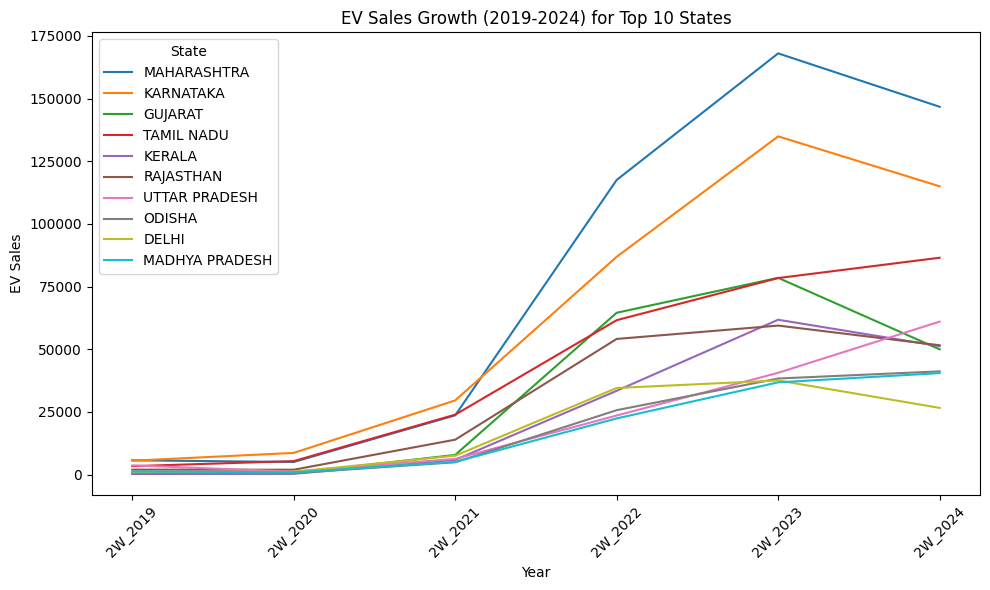

In [111]:
# Select the top 10 states by 'EV_Sales_2023'
top_10_states = df_combined.nlargest(10, '2W_2023')

# Plot the EV sales data for the top 10 states
top_10_states.set_index('State')[['2W_2019', '2W_2020', '2W_2021', '2W_2022', '2W_2023', '2W_2024']].T.plot(figsize=(10,6))

plt.title('EV Sales Growth (2019-2024) for Top 10 States')
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.xticks(rotation=45)  # Rotate the x-axis labels
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


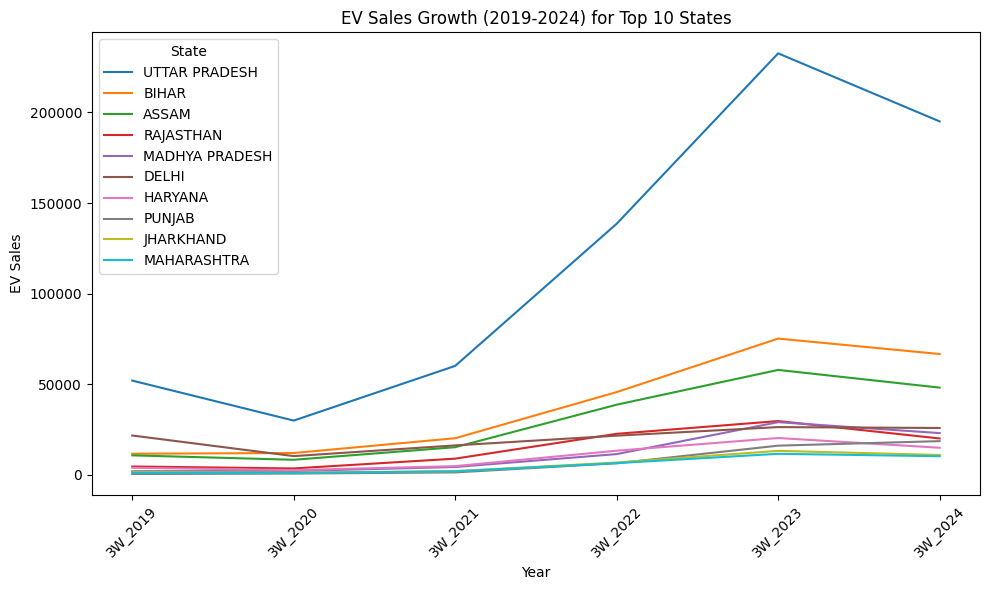

In [112]:

# Select the top 10 states by 'EV_Sales_2023'
top_10_states = df_combined.nlargest(10, '3W_2023')

# Plot the EV sales data for the top 10 states
top_10_states.set_index('State')[['3W_2019', '3W_2020', '3W_2021', '3W_2022', '3W_2023', '3W_2024']].T.plot(figsize=(10,6))

plt.title('EV Sales Growth (2019-2024) for Top 10 States')
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.xticks(rotation=45)  # Rotate the x-axis labels
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

as times goes sell growths are upword diraction like Maharashtra ,Karnataka show very Higest growth on 2021 to 2024

The line plot emphasizes that Maharashtra and Karnataka are at the forefront of this growth. This aligns well with your geographic segmentation strategy, confirming that these regions have the infrastructure, consumer base, and market conditions conducive to 4-wheeler EV adoption.

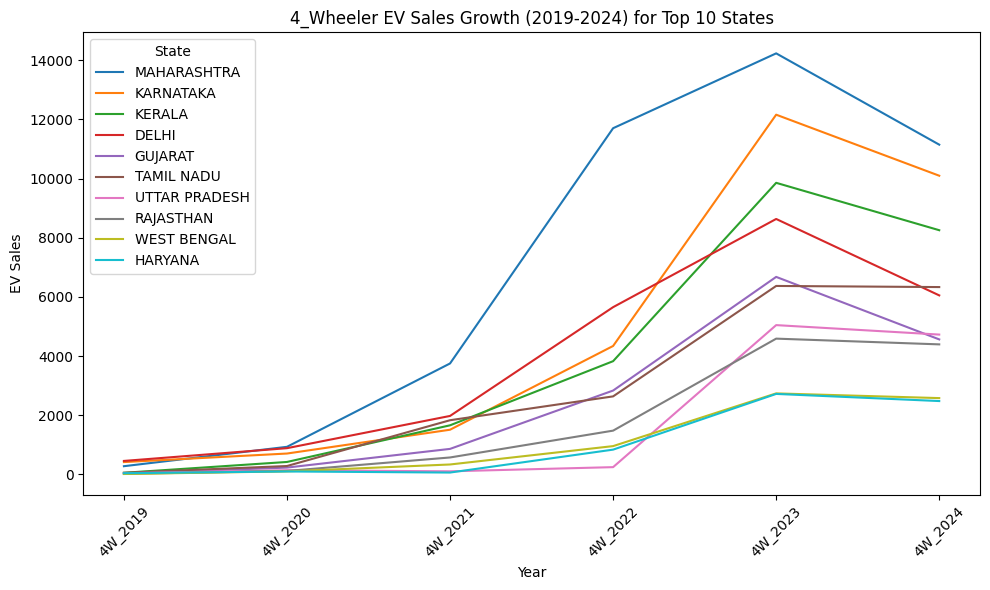

In [113]:
# Select the top 10 states by 'EV_Sales_2023'
top_10_states = df_combined.nlargest(10, '4W_2023')

# Plot the EV sales data for the top 10 states
top_10_states.set_index('State')[['4W_2019', '4W_2020', '4W_2021', '4W_2022', '4W_2023', '4W_2024']].T.plot(figsize=(10,6))

plt.title('4_Wheeler EV Sales Growth (2019-2024) for Top 10 States')
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.xticks(rotation=45)  # Rotate the x-axis labels
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Correlation Heatmap

 correlation coefficient range of 0.78 to 0.87 indicates a strong positive correlation between the number of charging stations and 2-wheeler EV sales. This means that as the number of charging stations increases, 2-wheeler EV sales tend to rise significantly.

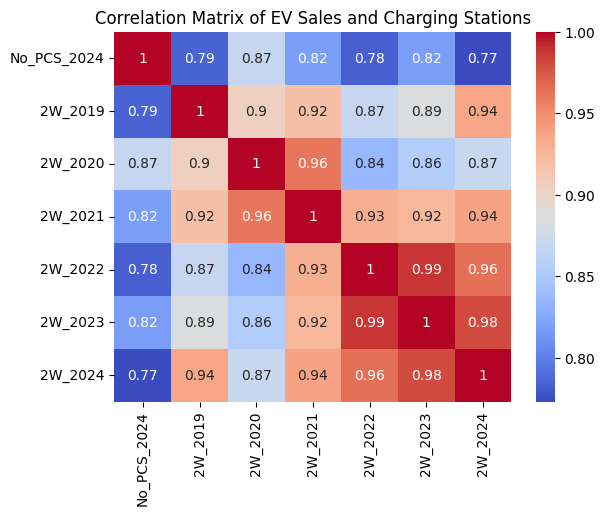

In [114]:


# Assuming the combined dataframe includes all the sales and station data
correlation_data = df_combined[['No_PCS_2024', '2W_2019', '2W_2020', '2W_2021', '2W_2022', '2W_2023', '2W_2024']]
correlation_matrix = correlation_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix of EV Sales and Charging Stations')
plt.show()


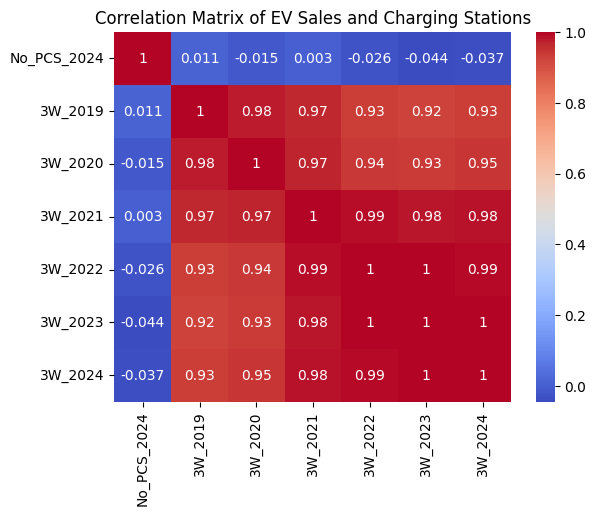

In [115]:
# Assuming the combined dataframe includes all the sales and station data
correlation_data = df_combined[['No_PCS_2024', '3W_2019', '3W_2020', '3W_2021', '3W_2022', '3W_2023', '3W_2024']]
correlation_matrix = correlation_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix of EV Sales and Charging Stations')
plt.show()

A correlation coefficient ranging from 0.78 to 0.85 indicates a strong positive correlation between the number of charging stations and 4-wheeler EV sales. This suggests that as the number of charging stations increases, sales of 4-wheeler EVs also tend to rise significantly.

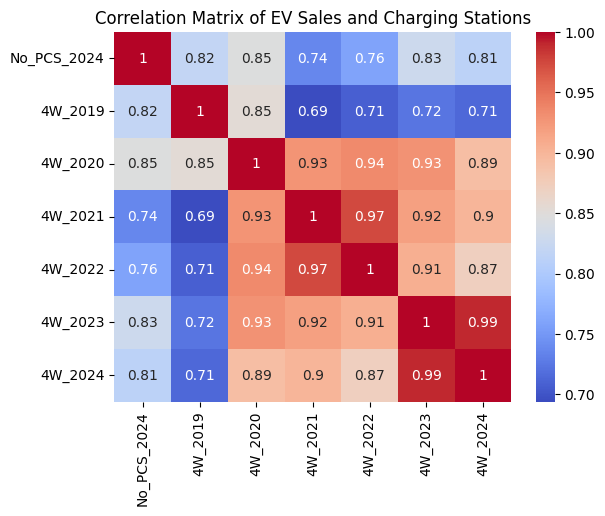

In [116]:
# Assuming the combined dataframe includes all the sales and station data
correlation_data = df_combined[['No_PCS_2024', '4W_2019', '4W_2020', '4W_2021', '4W_2022', '4W_2023', '4W_2024']]
correlation_matrix = correlation_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix of EV Sales and Charging Stations')
plt.show()

# K means clustering
to perform segmentation of states based on EV sales and charging station data, clustering can group states with similar characteristics.

In [117]:
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

# Data preparation
X = df_combined[['No_PCS_2024', '2W_2023']].fillna(0)
y= df_combined[['No_PCS_2024','4W_2023']].fillna(0)
# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled =scaler.fit_transform(y)

from sklearn.decomposition import PCA

# Performing PCA to reduce dimensionality
pca = PCA(n_components=2)
pca1=PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
y_pca = pca1.fit_transform(y_scaled)
# Optional: Check how much variance is explained by the principal components
print(pca.explained_variance_ratio_,pca1.explained_variance_ratio_)


[0.90902406 0.09097594] [0.91445948 0.08554052]


### 2_Wheeler Data

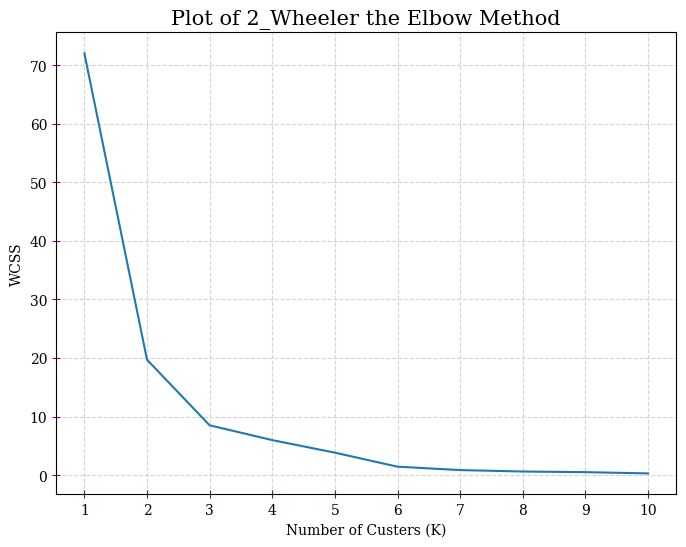

In [118]:
# plotting the results of Elbow

wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of 2_Wheeler the Elbow Method', size=15, family='serif')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

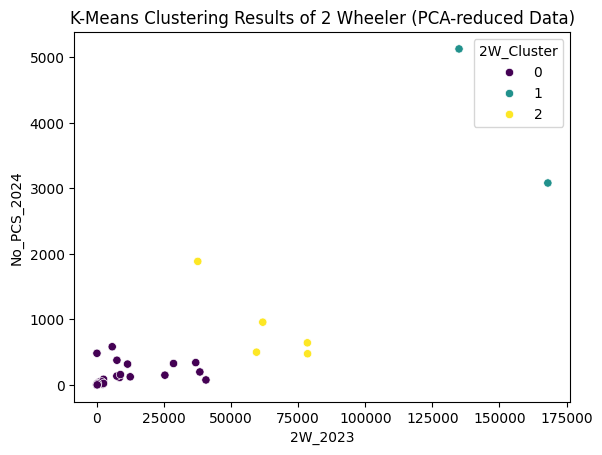

In [119]:


# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=90)  # Define the number of clusters
clusters = kmeans.fit_predict(X_pca)  # Use X_scaled if not using PCA

# Add cluster labels to the original dataframe
df_combined['2W_Cluster'] = clusters

# Plot clusters

sns.scatterplot(x=df_combined['2W_2023'], y=df_combined['No_PCS_2024'], hue=df_combined['2W_Cluster'], palette='viridis')
plt.title('K-Means Clustering Results of 2 Wheeler (PCA-reduced Data)')
plt.show()


### Karnataka, Maharashtra are showing High potential: High sales and good infrastructure 2_Wheeler

In [120]:
df_combined[df_combined['2W_Cluster'] == 1]

,State,2W_2019,3W_2019,4W_2019,2W_2020,3W_2020,4W_2020,2W_2021,3W_2021,4W_2021,...,3W_2022,4W_2022,2W_2023,3W_2023,4W_2023,2W_2024,3W_2024,4W_2024,No_PCS_2024,2W_Cluster
14,KARNATAKA,5566.0,163.0,415.0,8683.0,304.0,704.0,29620.0,2140.0,1509.0,...,4233.0,4340.0,134939.0,5280.0,12158.0,115023.0,5704.0,10095.0,5130.0,1
19,MAHARASHTRA,5727.0,1134.0,276.0,5064.0,1057.0,931.0,23671.0,1938.0,3749.0,...,6444.0,11701.0,168042.0,11601.0,14231.0,146739.0,10263.0,11145.0,3083.0,1


### DELHI,GUJARAT,KERALAM,RAJASTHAN,TAMIL NADUare showing Moderate potential: Growing sales but lower station density 2_Wheeler

In [121]:
df_combined[df_combined['2W_Cluster'] == 2]

,State,2W_2019,3W_2019,4W_2019,2W_2020,3W_2020,4W_2020,2W_2021,3W_2021,4W_2021,...,3W_2022,4W_2022,2W_2023,3W_2023,4W_2023,2W_2024,3W_2024,4W_2024,No_PCS_2024,2W_Cluster
7,DELHI,1060.0,21707.0,454.0,1164.0,10328.0,885.0,7557.0,16248.0,1975.0,...,21621.0,5652.0,37573.0,26343.0,8633.0,26639.0,25855.0,6050.0,1886.0,2
9,GUJARAT,504.0,356.0,28.0,530.0,338.0,229.0,7883.0,753.0,861.0,...,1365.0,2833.0,78503.0,3038.0,6675.0,49987.0,2968.0,4562.0,476.0,2
15,KERALA,263.0,143.0,53.0,351.0,598.0,419.0,5881.0,1197.0,1658.0,...,2295.0,3826.0,61792.0,4074.0,9855.0,51248.0,3971.0,8253.0,958.0,2
27,RAJASTHAN,2007.0,4609.0,17.0,1968.0,3521.0,115.0,13959.0,8936.0,571.0,...,22635.0,1478.0,59466.0,29673.0,4588.0,51615.0,20068.0,4394.0,500.0,2
29,TAMIL NADU,3389.0,0.0,54.0,5413.0,2.0,282.0,23935.0,4269.0,1830.0,...,2736.0,2636.0,78422.0,5443.0,6369.0,86522.0,4867.0,6331.0,643.0,2


### The remaning 29 showing Low potential: Low sales and minimal infrastructure 2_Wheeler

In [128]:
df_combined[df_combined['2W_Cluster'] == 0]

,State,2W_2019,3W_2019,4W_2019,2W_2020,3W_2020,4W_2020,2W_2021,3W_2021,4W_2021,...,4W_2022,2W_2023,3W_2023,4W_2023,2W_2024,3W_2024,4W_2024,No_PCS_2024,2W_Cluster,4_Cluster
0,ANDAMAN & NICOBAR ISLAND,0.0,0.0,2.0,1.0,0.0,35.0,0.0,30.0,22.0,...,7.0,12.0,0.0,14.0,34.0,0.0,11.0,3.0,0,0
1,ANDHRA PRADESH,1376.0,174.0,274.0,925.0,136.0,60.0,7897.0,459.0,394.0,...,786.0,28542.0,2497.0,1675.0,35607.0,2381.0,2914.0,327.0,0,0
2,ARUNACHAL PRADESH,1.0,0.0,0.0,1.0,0.0,3.0,2.0,0.0,0.0,...,1.0,3.0,0.0,18.0,7.0,3.0,23.0,9.0,0,0
3,ASSAM,98.0,10757.0,1.0,40.0,8310.0,7.0,377.0,15247.0,8.0,...,89.0,2453.0,57901.0,285.0,3548.0,48133.0,369.0,86.0,0,0
4,BIHAR,714.0,11653.0,13.0,384.0,12041.0,22.0,2789.0,20208.0,62.0,...,148.0,12404.0,75194.0,619.0,15426.0,66673.0,691.0,124.0,0,0
5,CHANDIGARH,20.0,479.0,8.0,12.0,322.0,35.0,198.0,386.0,111.0,...,272.0,2148.0,3198.0,1065.0,1210.0,2334.0,1046.0,12.0,0,0
6,CHHATTISGARH,913.0,1824.0,7.0,608.0,872.0,9.0,2632.0,1514.0,70.0,...,367.0,25322.0,11357.0,1562.0,22677.0,10251.0,1355.0,149.0,0,0
8,GOA,31.0,7.0,4.0,55.0,2.0,25.0,848.0,14.0,198.0,...,638.0,8406.0,45.0,987.0,8344.0,27.0,964.0,113.0,0,0
10,HARYANA,1163.0,3902.0,39.0,274.0,2608.0,98.0,3792.0,4806.0,61.0,...,836.0,7441.0,20314.0,2719.0,12668.0,14953.0,2478.0,377.0,0,0
11,HIMACHAL PRADESH,1.0,0.0,4.0,22.0,155.0,3.0,304.0,11.0,11.0,...,46.0,889.0,41.0,166.0,913.0,104.0,215.0,44.0,0,0


## 4 _Wheeler Data

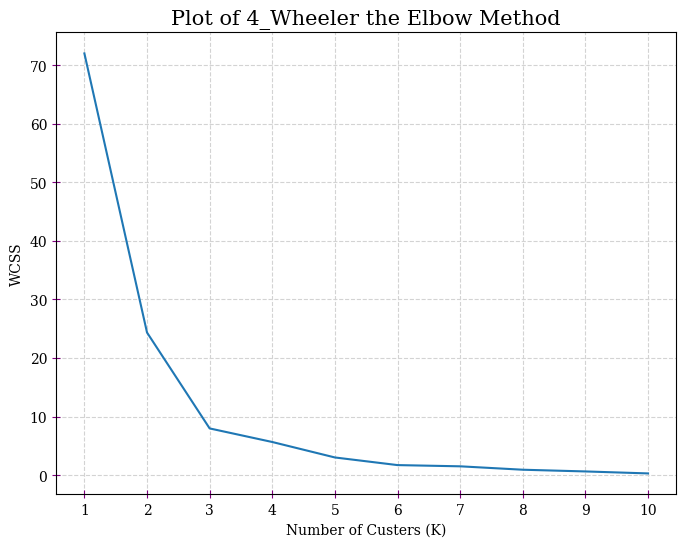

In [123]:
# plotting the results of Elbow

wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(y_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of 4_Wheeler the Elbow Method', size=15, family='serif')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

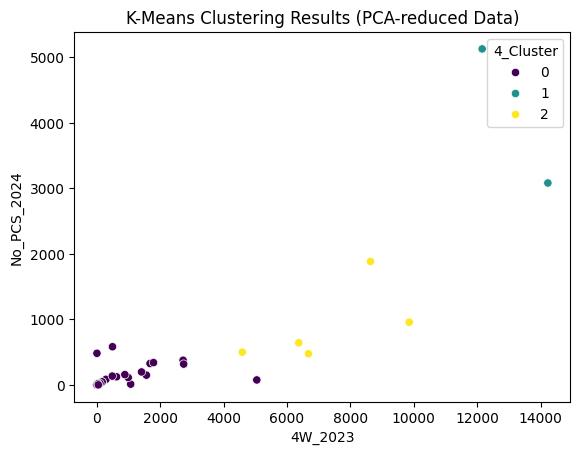

In [124]:


# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=90)  # Define the number of clusters
clusters4 = kmeans.fit_predict(y_pca)  #  y_scaled using PCA

# Add cluster labels to the original dataframe
df_combined['4_Cluster'] = clusters

# Plot clusters

sns.scatterplot(x=df_combined['4W_2023'], y=df_combined['No_PCS_2024'], hue=df_combined['4_Cluster'], palette='viridis')
plt.title('K-Means Clustering Results (PCA-reduced Data)')
plt.show()

### Karnataka, Maharashtra are showing High potential: High sales and good infrastructure 4_Wheeler

In [125]:
df_combined[df_combined['4_Cluster'] == 1]

,State,2W_2019,3W_2019,4W_2019,2W_2020,3W_2020,4W_2020,2W_2021,3W_2021,4W_2021,...,4W_2022,2W_2023,3W_2023,4W_2023,2W_2024,3W_2024,4W_2024,No_PCS_2024,2W_Cluster,4_Cluster
14,KARNATAKA,5566.0,163.0,415.0,8683.0,304.0,704.0,29620.0,2140.0,1509.0,...,4340.0,134939.0,5280.0,12158.0,115023.0,5704.0,10095.0,5130.0,1,1
19,MAHARASHTRA,5727.0,1134.0,276.0,5064.0,1057.0,931.0,23671.0,1938.0,3749.0,...,11701.0,168042.0,11601.0,14231.0,146739.0,10263.0,11145.0,3083.0,1,1


### DELHI,GUJARAT,KERALAM,RAJASTHAN,TAMIL NADUare showing Moderate potential: Growing sales but lower station density 4_Wheerer

In [126]:
df_combined[df_combined['4_Cluster'] == 2]

,State,2W_2019,3W_2019,4W_2019,2W_2020,3W_2020,4W_2020,2W_2021,3W_2021,4W_2021,...,4W_2022,2W_2023,3W_2023,4W_2023,2W_2024,3W_2024,4W_2024,No_PCS_2024,2W_Cluster,4_Cluster
7,DELHI,1060.0,21707.0,454.0,1164.0,10328.0,885.0,7557.0,16248.0,1975.0,...,5652.0,37573.0,26343.0,8633.0,26639.0,25855.0,6050.0,1886.0,2,2
9,GUJARAT,504.0,356.0,28.0,530.0,338.0,229.0,7883.0,753.0,861.0,...,2833.0,78503.0,3038.0,6675.0,49987.0,2968.0,4562.0,476.0,2,2
15,KERALA,263.0,143.0,53.0,351.0,598.0,419.0,5881.0,1197.0,1658.0,...,3826.0,61792.0,4074.0,9855.0,51248.0,3971.0,8253.0,958.0,2,2
27,RAJASTHAN,2007.0,4609.0,17.0,1968.0,3521.0,115.0,13959.0,8936.0,571.0,...,1478.0,59466.0,29673.0,4588.0,51615.0,20068.0,4394.0,500.0,2,2
29,TAMIL NADU,3389.0,0.0,54.0,5413.0,2.0,282.0,23935.0,4269.0,1830.0,...,2636.0,78422.0,5443.0,6369.0,86522.0,4867.0,6331.0,643.0,2,2


### The remaning 29 states showing Low potential: Low sales and minimal infrastructure of 4_Wheeler

In [127]:
df_combined[df_combined['4_Cluster'] == 0]

,State,2W_2019,3W_2019,4W_2019,2W_2020,3W_2020,4W_2020,2W_2021,3W_2021,4W_2021,...,4W_2022,2W_2023,3W_2023,4W_2023,2W_2024,3W_2024,4W_2024,No_PCS_2024,2W_Cluster,4_Cluster
0,ANDAMAN & NICOBAR ISLAND,0.0,0.0,2.0,1.0,0.0,35.0,0.0,30.0,22.0,...,7.0,12.0,0.0,14.0,34.0,0.0,11.0,3.0,0,0
1,ANDHRA PRADESH,1376.0,174.0,274.0,925.0,136.0,60.0,7897.0,459.0,394.0,...,786.0,28542.0,2497.0,1675.0,35607.0,2381.0,2914.0,327.0,0,0
2,ARUNACHAL PRADESH,1.0,0.0,0.0,1.0,0.0,3.0,2.0,0.0,0.0,...,1.0,3.0,0.0,18.0,7.0,3.0,23.0,9.0,0,0
3,ASSAM,98.0,10757.0,1.0,40.0,8310.0,7.0,377.0,15247.0,8.0,...,89.0,2453.0,57901.0,285.0,3548.0,48133.0,369.0,86.0,0,0
4,BIHAR,714.0,11653.0,13.0,384.0,12041.0,22.0,2789.0,20208.0,62.0,...,148.0,12404.0,75194.0,619.0,15426.0,66673.0,691.0,124.0,0,0
5,CHANDIGARH,20.0,479.0,8.0,12.0,322.0,35.0,198.0,386.0,111.0,...,272.0,2148.0,3198.0,1065.0,1210.0,2334.0,1046.0,12.0,0,0
6,CHHATTISGARH,913.0,1824.0,7.0,608.0,872.0,9.0,2632.0,1514.0,70.0,...,367.0,25322.0,11357.0,1562.0,22677.0,10251.0,1355.0,149.0,0,0
8,GOA,31.0,7.0,4.0,55.0,2.0,25.0,848.0,14.0,198.0,...,638.0,8406.0,45.0,987.0,8344.0,27.0,964.0,113.0,0,0
10,HARYANA,1163.0,3902.0,39.0,274.0,2608.0,98.0,3792.0,4806.0,61.0,...,836.0,7441.0,20314.0,2719.0,12668.0,14953.0,2478.0,377.0,0,0
11,HIMACHAL PRADESH,1.0,0.0,4.0,22.0,155.0,3.0,304.0,11.0,11.0,...,46.0,889.0,41.0,166.0,913.0,104.0,215.0,44.0,0,0


# Conclusion:
Refine Product Offerings: Based on your segmentation, tailor your products to the specific needs and infrastructure availability in each region.

Optimize Pricing Strategy: Set competitive prices in the high-potential and moderate-potential regions to maximize adoption.

Monitor Market Trends: Keep analyzing the market for shifts in infrastructure development or sales trends that could change a state's potential.

 ## 1. High Potential Segment (Karnataka, Maharashtra):
### strategy: Focus your initial market entry here. These states have a strong combination of both EV sales and infrastructure, which indicates they are ready for greater EV adoption.

### Actions:

Targeted Marketing: Promote the benefits of your EVs, highlighting the well-established charging infrastructure.

Expand Product Range: Introduce a wide variety of models, including premium and mid-range options, as these regions have the highest demand and infrastructure support.

## 2. Moderate Potential Segment (Delhi, Gujarat, Kerala, Rajasthan, Tamil Nadu):
### Strategy: These regions show promise but may need further infrastructure development to reach their full potential.
### Actions:
Partnerships for Infrastructure Development: Collaborate with local governments to expand charging stations.

Phased Market Entry: Enter these regions after establishing yourself in high-potential areas. Offer mid-range EVs to attract early adopters, gradually increasing your presence as infrastructure improves.

 ## 3.Low Potential Segment (Remaining 29 States):
### Strategy: These states have minimal infrastructure and lower sales, so market entry should be more cautious.
### Actions:
Monitor Development: Keep track of infrastructure expansion and sales growth before investing heavily.

Niche Products: Introduce specific models tailored to regions where infrastructure is improving or focus on electric 2-wheelers, which require less infrastructure